# Regularized linear model

Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any relationship between health resources and sociodemographic data.

#### target = Obesity_prevalence

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
raw_data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [3]:
raw_data = raw_data.drop_duplicates().reset_index(drop = True)


In [4]:
raw_data.shape

(3140, 108)

In [5]:
data_types = raw_data.dtypes
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(f"Categorical_columns: {categorical_columns}")
print(f"Numeric_columns: {numeric_columns}")

Categorical_columns: ['COUNTY_NAME', 'STATE_NAME']
Numeric_columns: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18"

In [6]:
raw_data["COUNTY_NAME"] = pd.factorize(raw_data["COUNTY_NAME"])[0]
raw_data["STATE_NAME"] = pd.factorize(raw_data["STATE_NAME"])[0]
raw_data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


#### A lot of variables, we have to select

In [7]:
data_types = raw_data.dtypes
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(f"Categorical_columns: {categorical_columns}")
print(f"Numeric_columns: {numeric_columns}")

Categorical_columns: []
Numeric_columns: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or hig

In [9]:
from sklearn.model_selection import train_test_split

target = raw_data['Obesity_prevalence']
predictors = raw_data.drop(['Obesity_prevalence'], axis=1)


X = predictors
y = target

#data with outliers no scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(f_regression, k = 72)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,26625.0,3221.0,3463.0,2922.0,2829.0,2831.0,3831.0,3860.0,2460.0,1208.0,...,13.0,2314.0,13.7,12.6,14.9,3.8,3.5,4.1,771.0,6.0
1,51266.0,5272.0,5751.0,5137.0,5341.0,5880.0,7885.0,8271.0,4801.0,2928.0,...,11.5,4097.0,13.1,11.9,14.2,3.5,3.2,3.8,1454.0,5.0
2,37779.0,3915.0,5118.0,6202.0,4363.0,4451.0,5107.0,4349.0,2713.0,1561.0,...,10.4,2792.0,12.2,11.2,13.1,2.9,2.7,3.1,871.0,2.0
3,91984.0,11163.0,12646.0,11595.0,11357.0,11444.0,12774.0,10791.0,6736.0,3478.0,...,9.3,5716.0,11.2,10.4,12.0,3.0,2.8,3.2,2118.0,3.0
4,134487.0,16698.0,17666.0,17281.0,15993.0,15845.0,17982.0,16909.0,10074.0,6039.0,...,11.0,10002.0,12.5,11.7,13.4,3.4,3.2,3.6,3490.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,42555.0,4478.0,6520.0,6989.0,4822.0,4879.0,5836.0,5062.0,2641.0,1328.0,...,6.6,1914.0,8.0,7.3,8.7,2.5,2.3,2.7,838.0,2.0
2508,56031.0,7624.0,7993.0,7669.0,7740.0,7959.0,7241.0,5615.0,2919.0,1271.0,...,10.0,3631.0,11.1,10.2,12.0,2.6,2.4,2.8,1094.0,3.0
2509,33443.0,4680.0,4568.0,4778.0,4199.0,3763.0,4355.0,3608.0,2322.0,1170.0,...,13.9,3111.0,16.0,15.0,16.9,4.0,3.8,4.3,1013.0,6.0
2510,5795.0,331.0,493.0,335.0,379.0,540.0,986.0,1312.0,938.0,481.0,...,15.1,661.0,16.1,14.6,17.7,4.5,4.2,5.0,229.0,6.0


In [14]:
data_types = X_train_sel.dtypes
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(f"Categorical_columns: {categorical_columns}")
print(f"Numeric_columns: {numeric_columns}")

Categorical_columns: []
Numeric_columns: ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', '% Black-alone', 'Asian-alone pop', '% Asian-alone', 'Two or more races pop', 'POP_ESTIMATE_2018', 'GQ_ESTIMATES_2018', 'R_death_2018', 'R_INTERNATIONAL_MIG_2018', 'R_NET_MIG_2018', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100

In [16]:
total_data = raw_data[['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', '% Black-alone', 'Asian-alone pop', '% Asian-alone', 'Two or more races pop', 'POP_ESTIMATE_2018', 'GQ_ESTIMATES_2018', 'R_death_2018', 'R_INTERNATIONAL_MIG_2018', 'R_NET_MIG_2018', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older', 'anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'anycondition_number', 'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number', 'Urban_rural_code']].copy()
total_data

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,...,9.9,3644,12.9,11.9,13.8,3.1,2.9,3.3,1326,3
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,...,10.1,14692,12.0,11.0,13.1,3.2,3.0,3.5,5479,4
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,...,13.3,2373,19.7,18.6,20.6,4.5,4.2,4.8,887,6
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,...,11.3,1789,14.1,13.2,14.9,3.3,3.1,3.6,595,2
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,...,12.0,4661,13.5,12.6,14.5,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,6104,6326,5359,6577,5334,5261,4943,2198,949,...,7.7,2098,8.9,8.3,9.6,2.6,2.4,2.8,821,5
3136,23081,2384,2185,2967,4093,3423,2928,2875,1569,657,...,6.0,928,7.2,6.5,8.0,2.4,2.2,2.6,447,5
3137,20299,3121,3205,2153,2702,2390,2434,2554,1233,507,...,9.2,1163,10.4,9.5,11.2,3.0,2.8,3.2,430,5
3138,7885,858,1113,715,903,900,1085,1118,741,452,...,9.6,506,11.3,10.3,12.1,3.4,3.2,3.7,207,6


## new data with the columns that have the most correlationship with 'Obesity_prevalence'

In [19]:
total_data = total_data.drop_duplicates().reset_index(drop = True)

In [20]:
total_data.isnull().sum().sort_values(ascending=False)

TOT_POP                                                           0
Active Physicians per 100000 Population 2018 (AAMC)               0
anycondition_number                                               0
anycondition_Upper 95% CI                                         0
anycondition_Lower 95% CI                                         0
                                                                 ..
Percent of adults with a high school diploma only 2014-18         0
Percent of adults with less than a high school diploma 2014-18    0
Bachelor's degree or higher 2014-18                               0
Some college or associate's degree 2014-18                        0
Urban_rural_code                                                  0
Length: 73, dtype: int64

#### no null values

## UNIVARIANT ANALYSIS 

#### NUMERIC

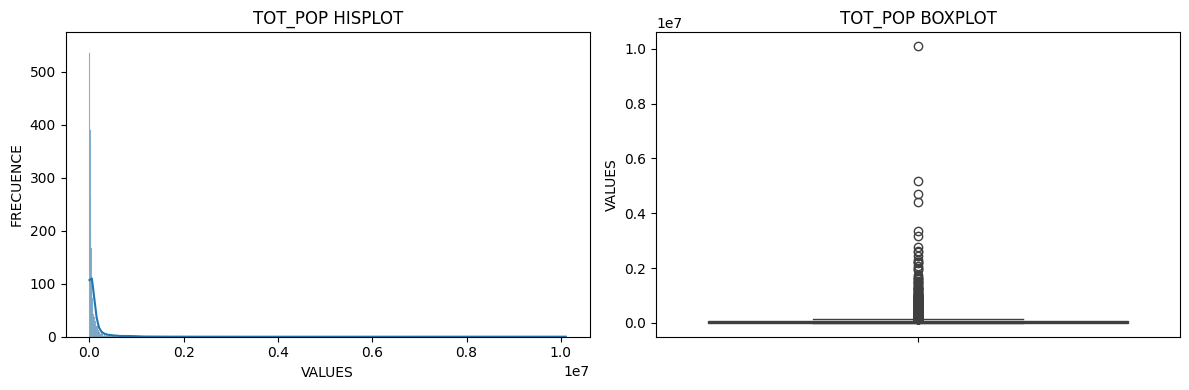

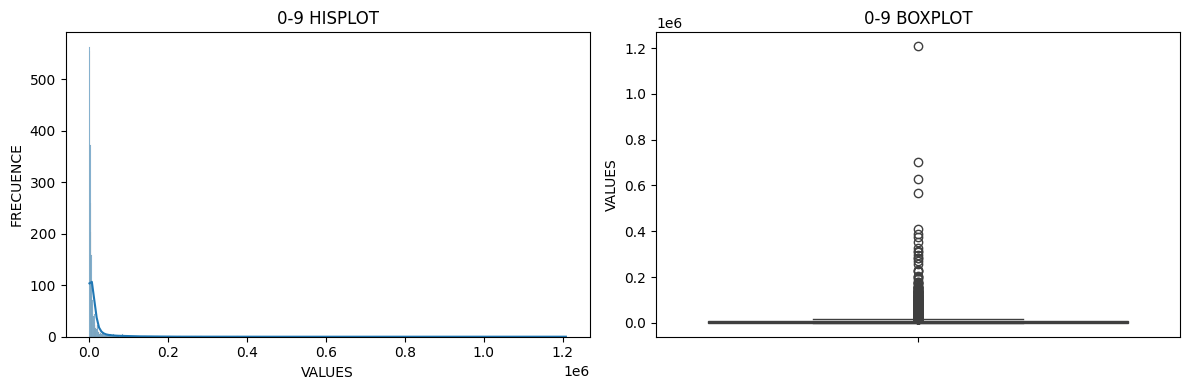

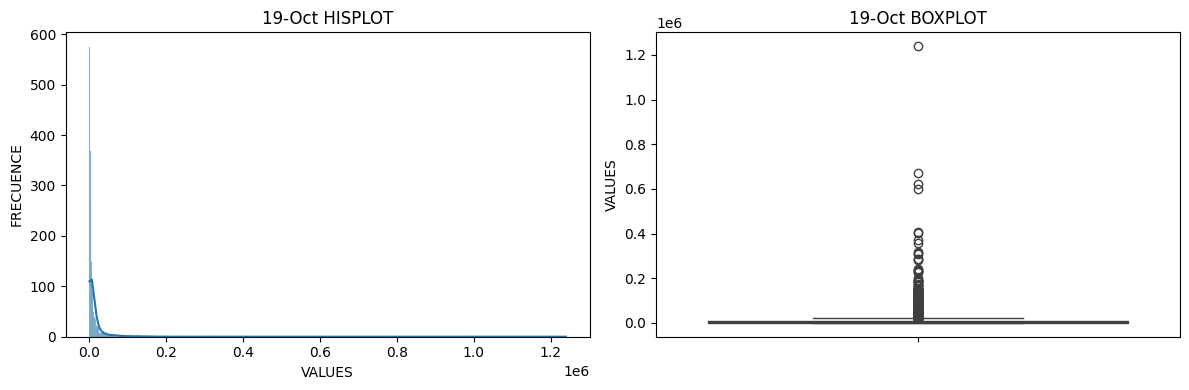

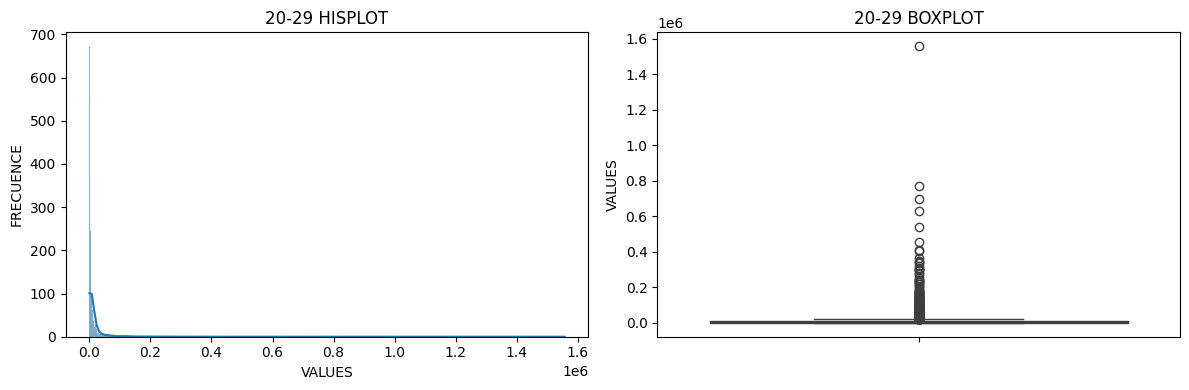

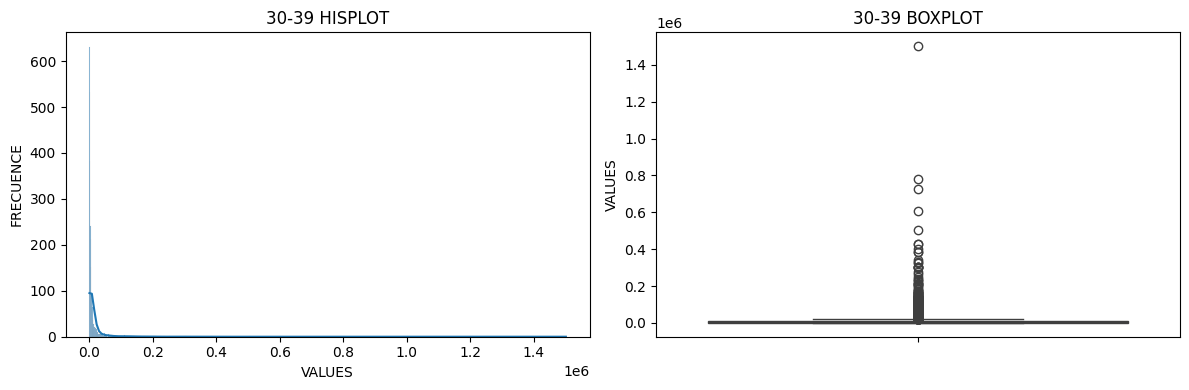

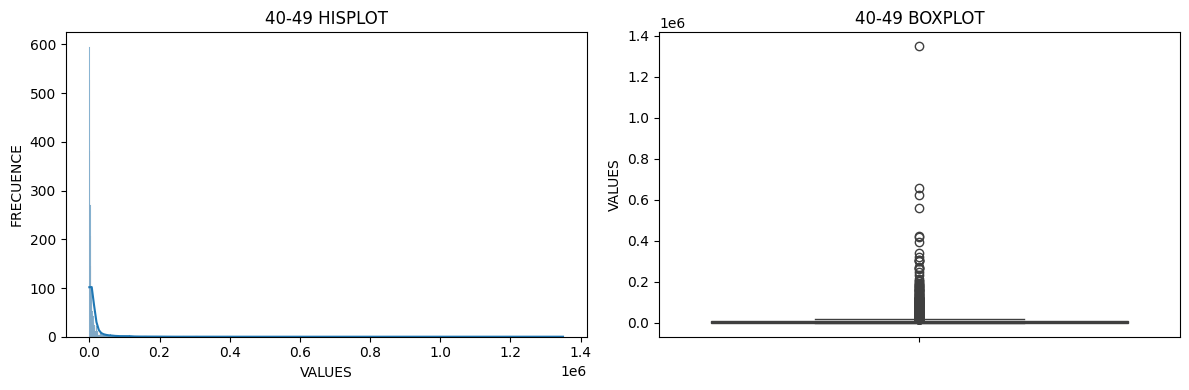

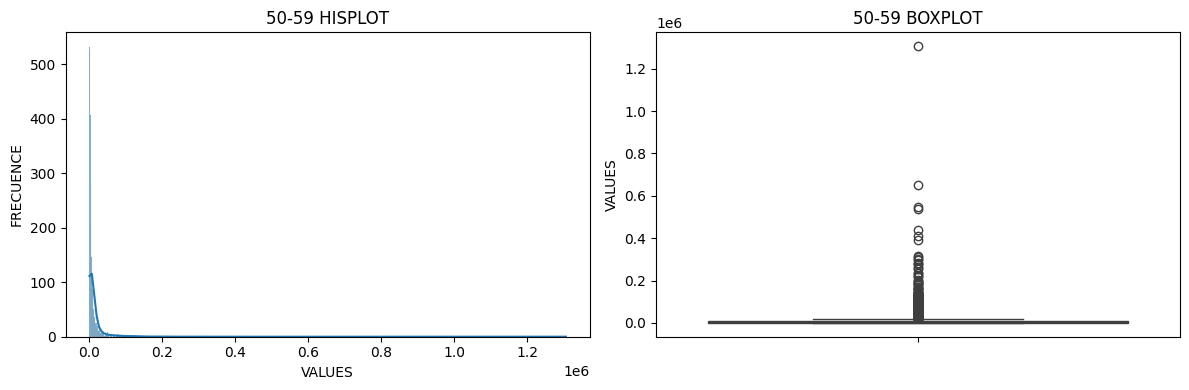

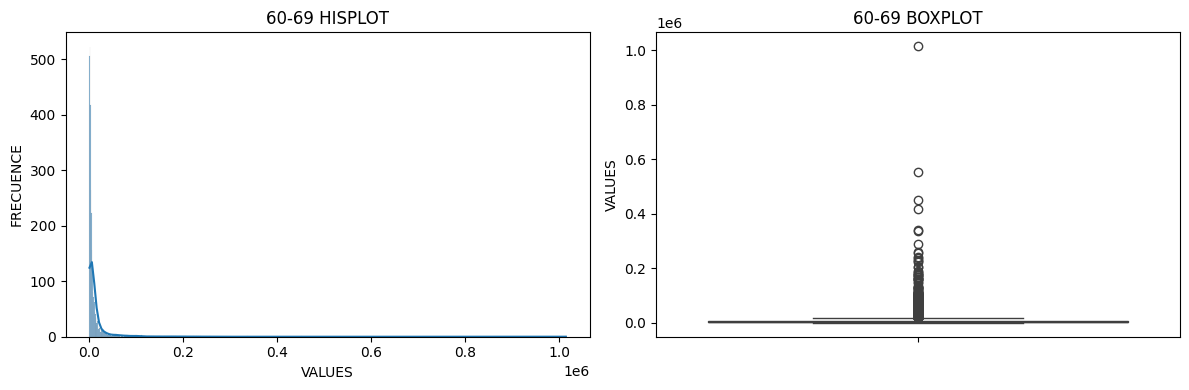

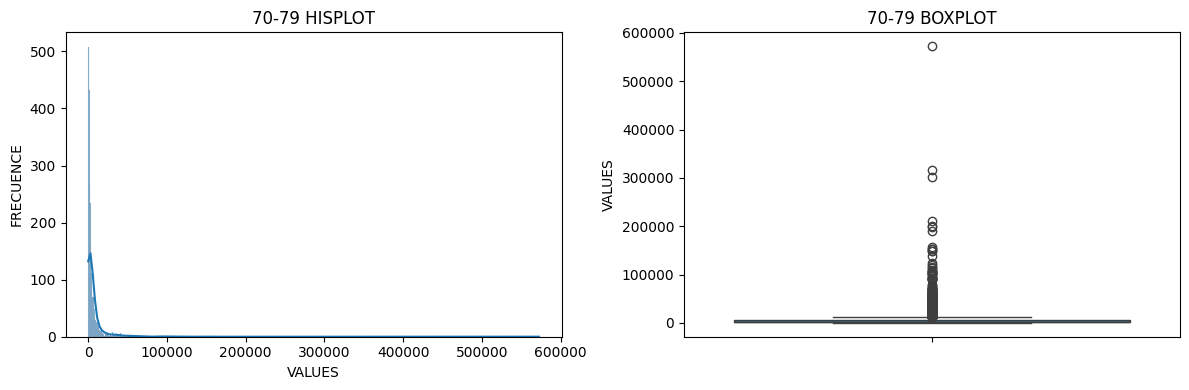

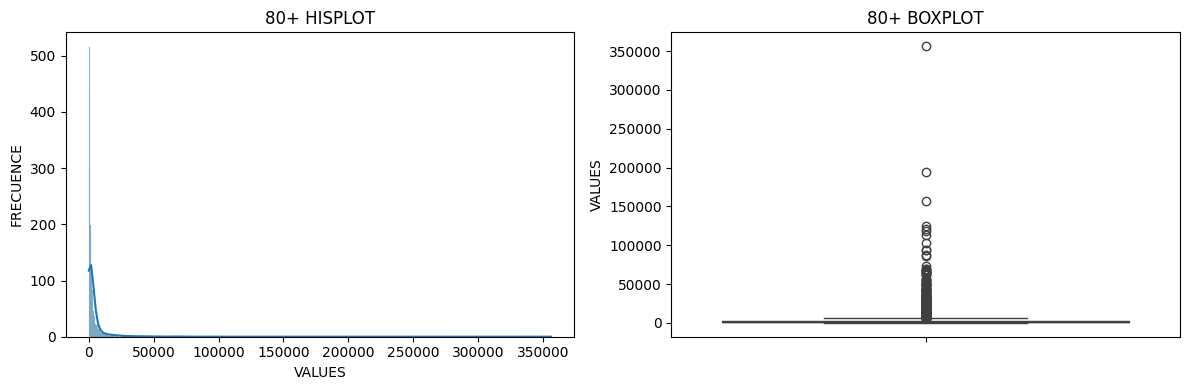

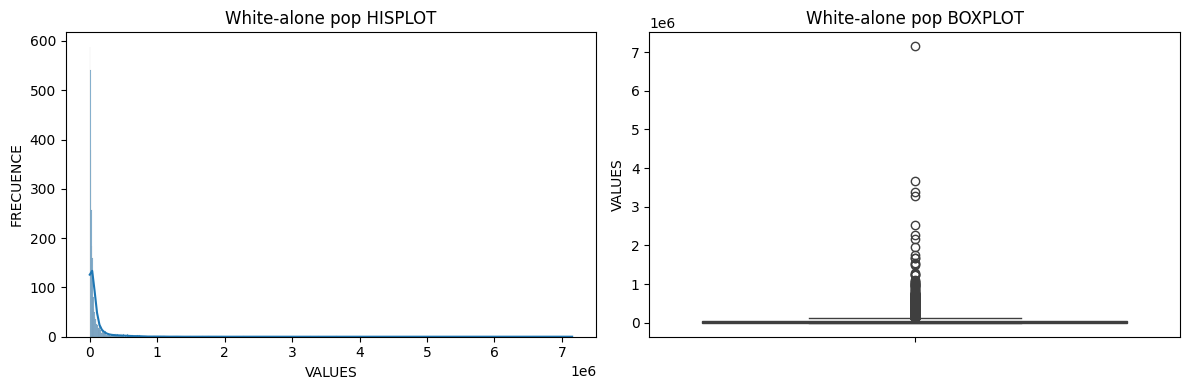

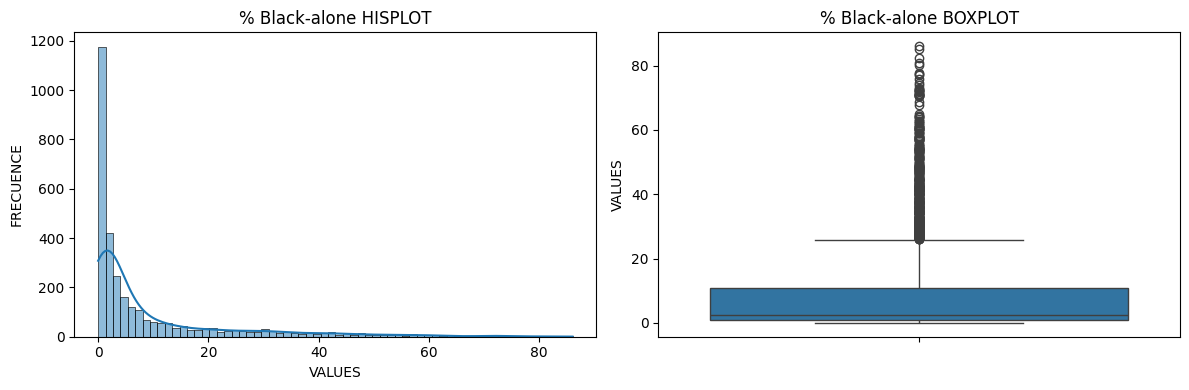

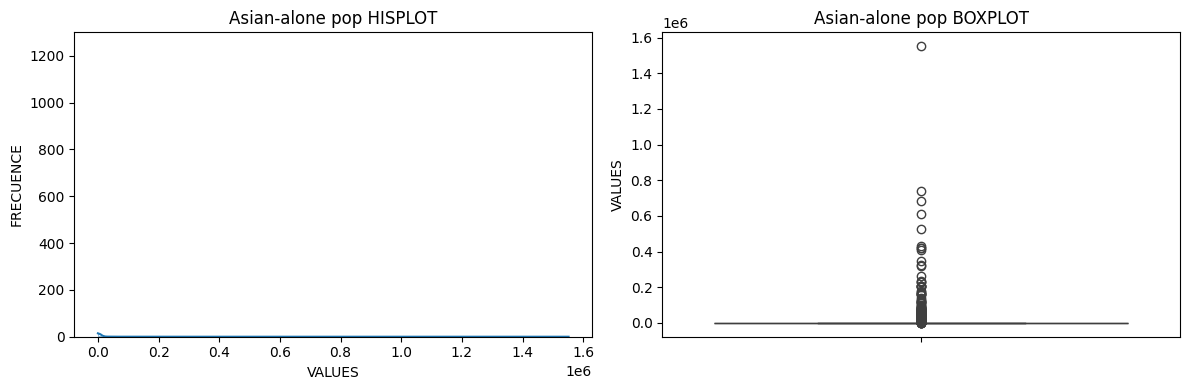

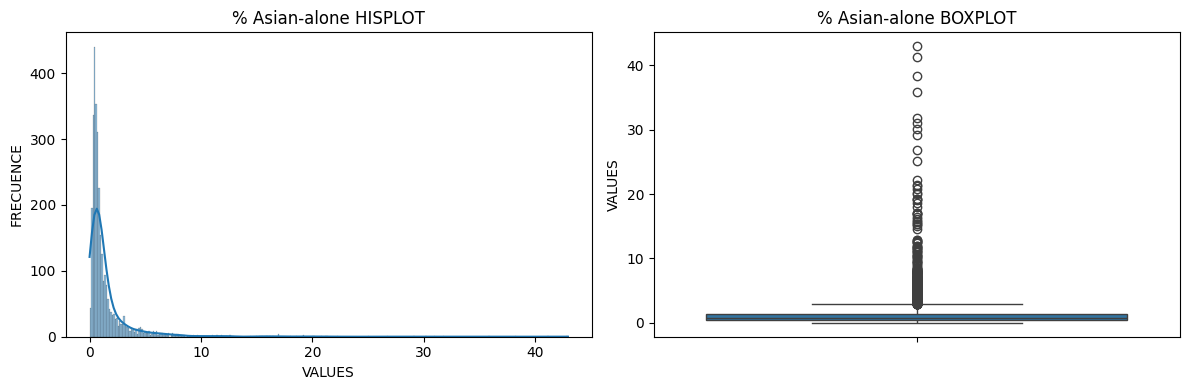

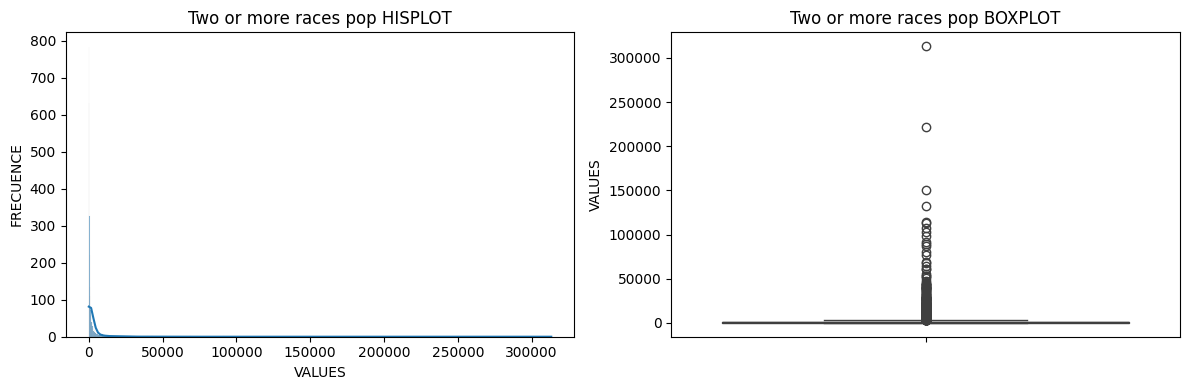

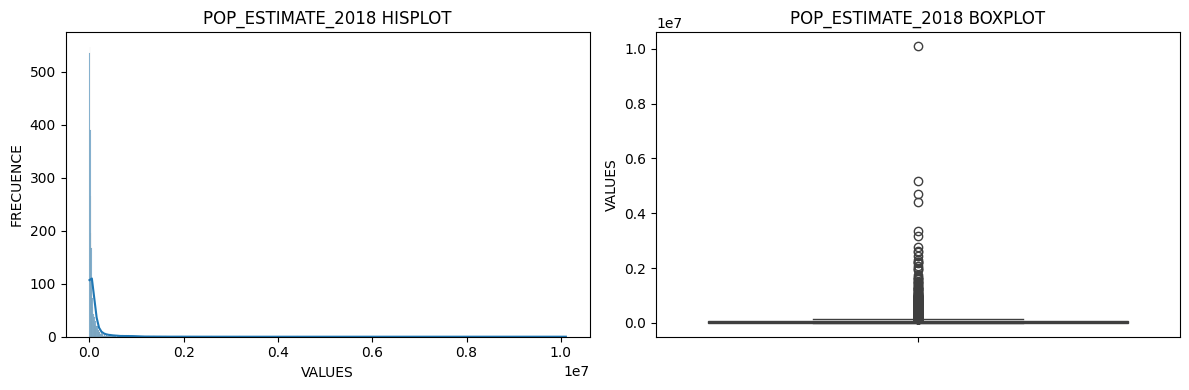

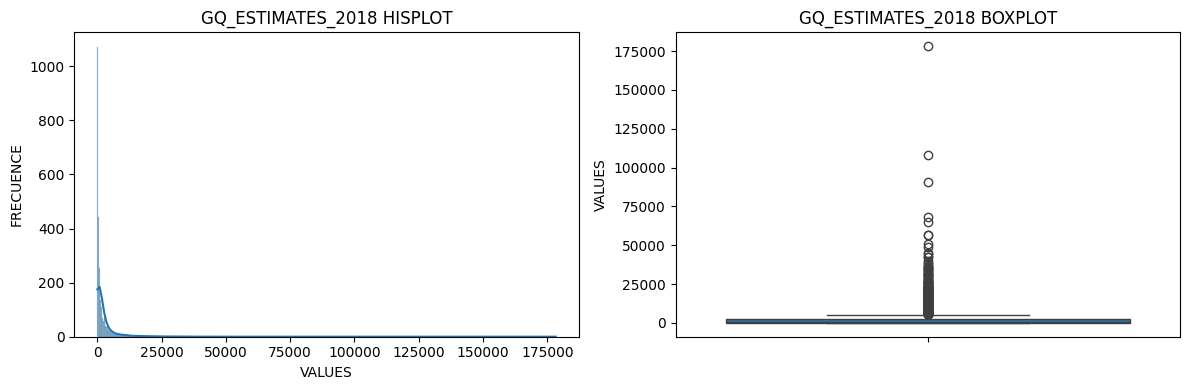

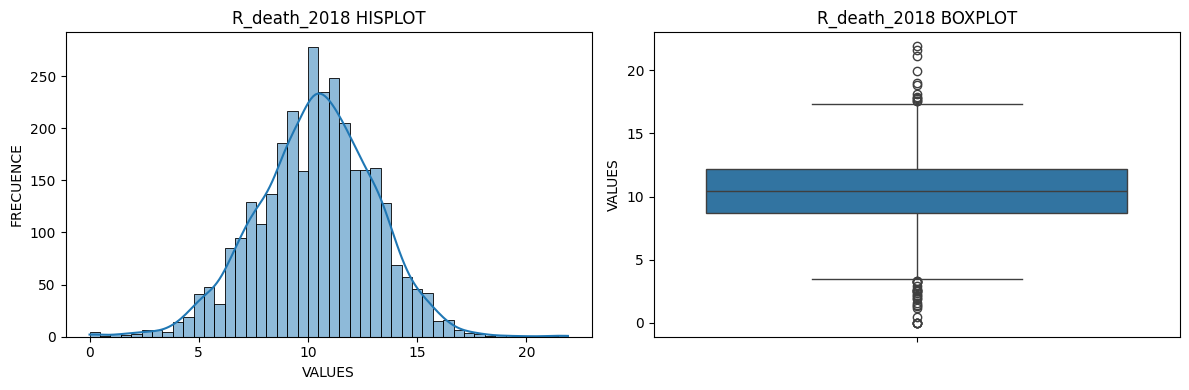

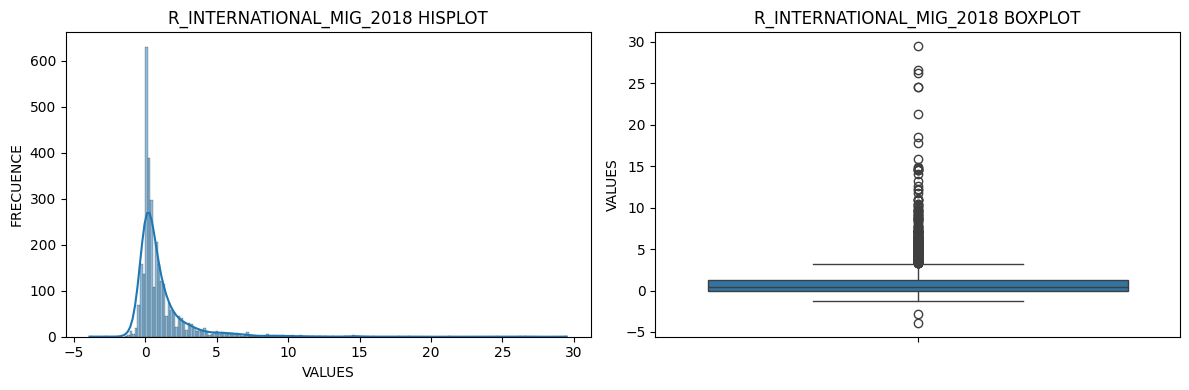

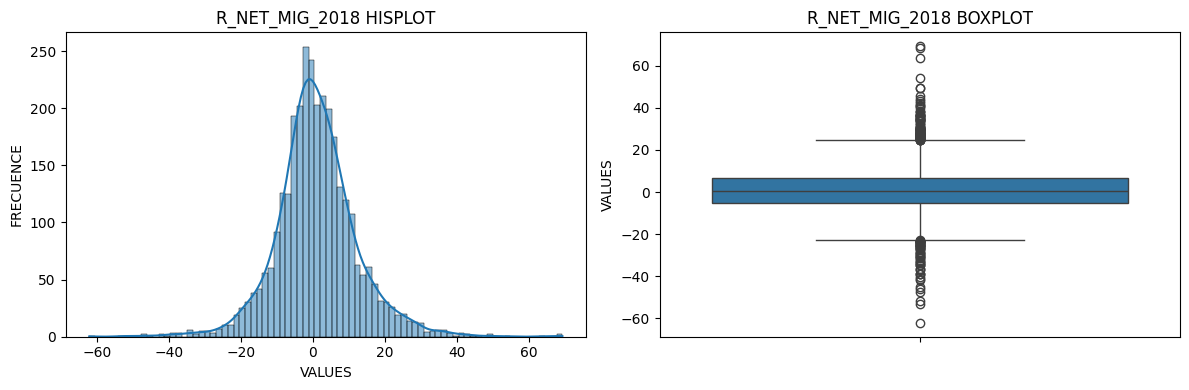

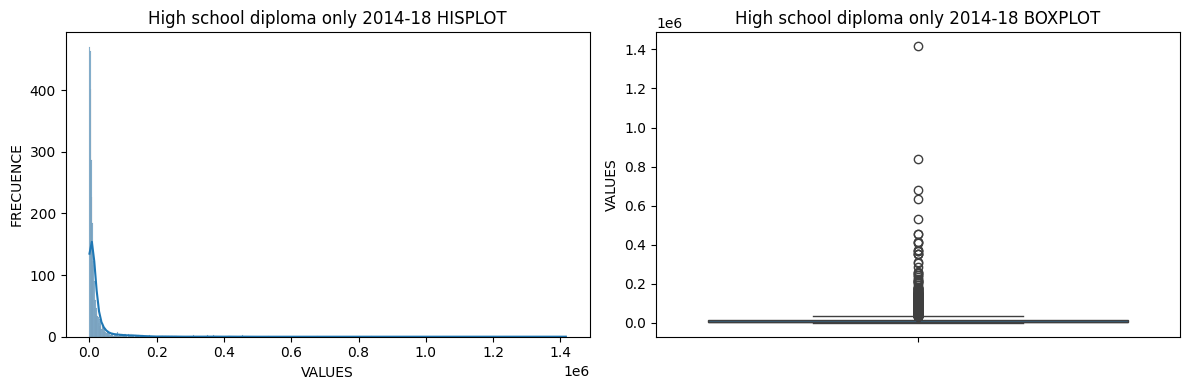

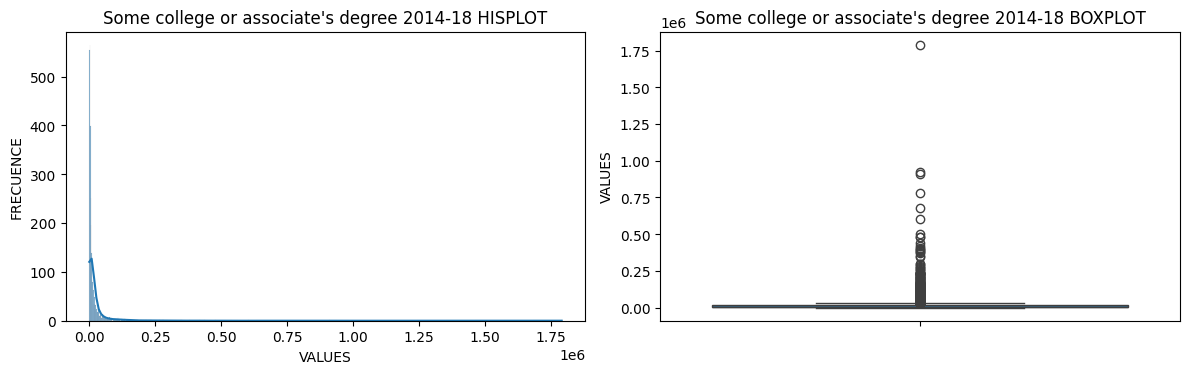

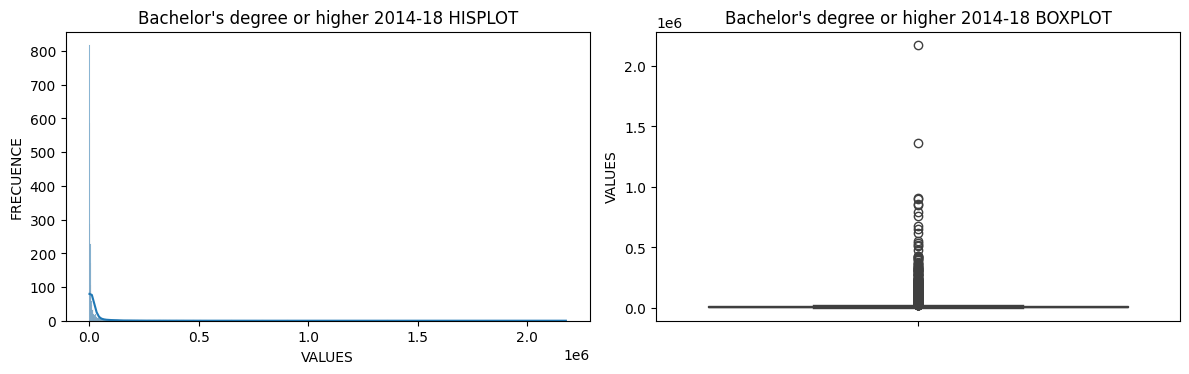

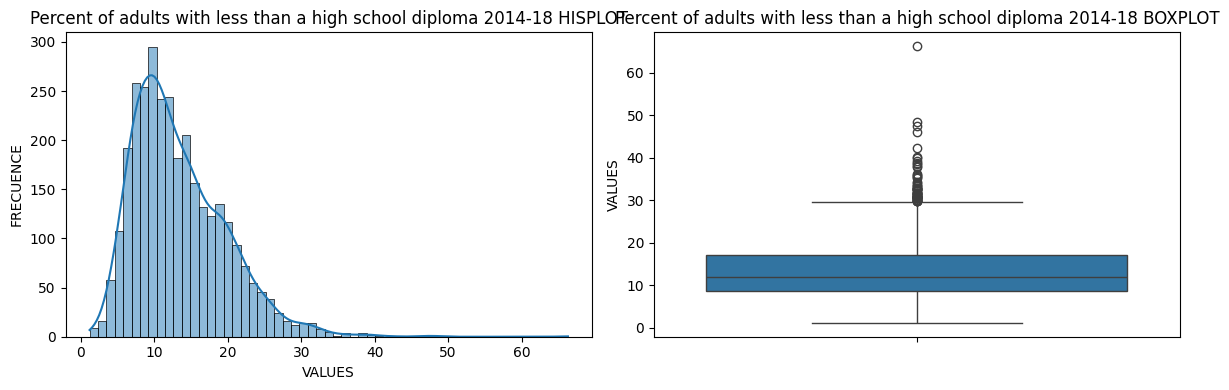

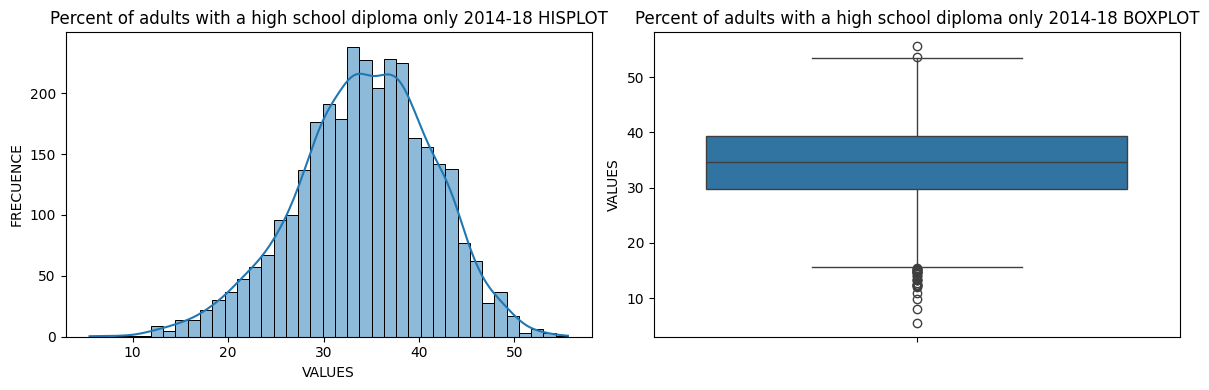

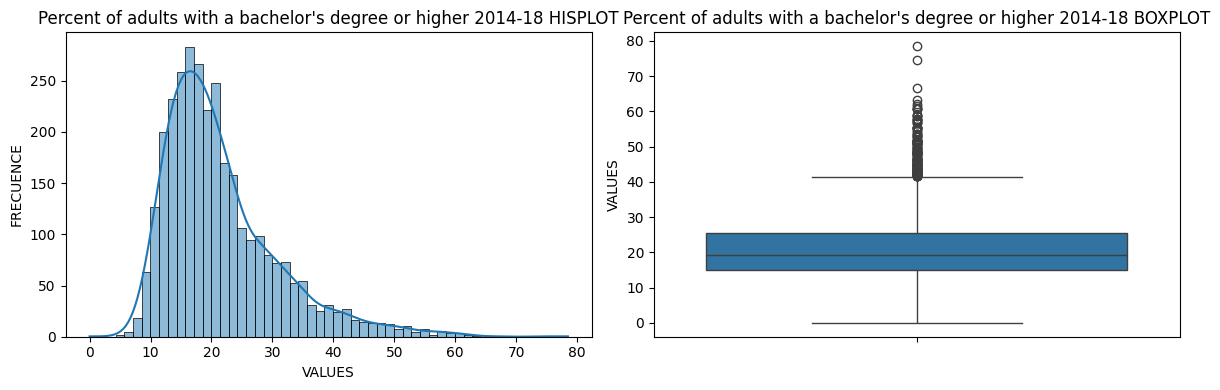

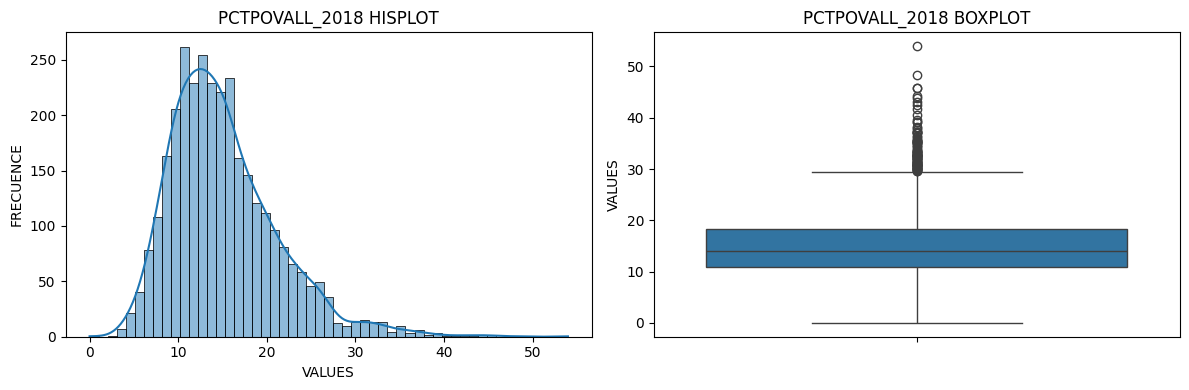

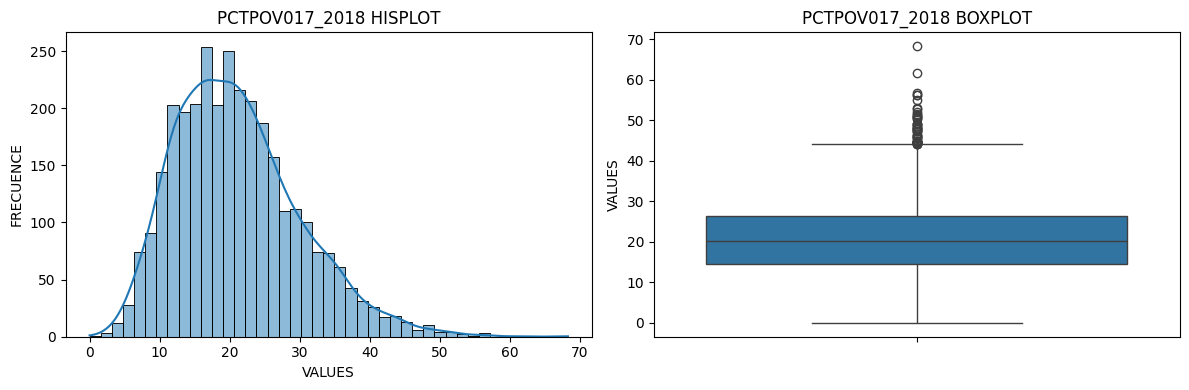

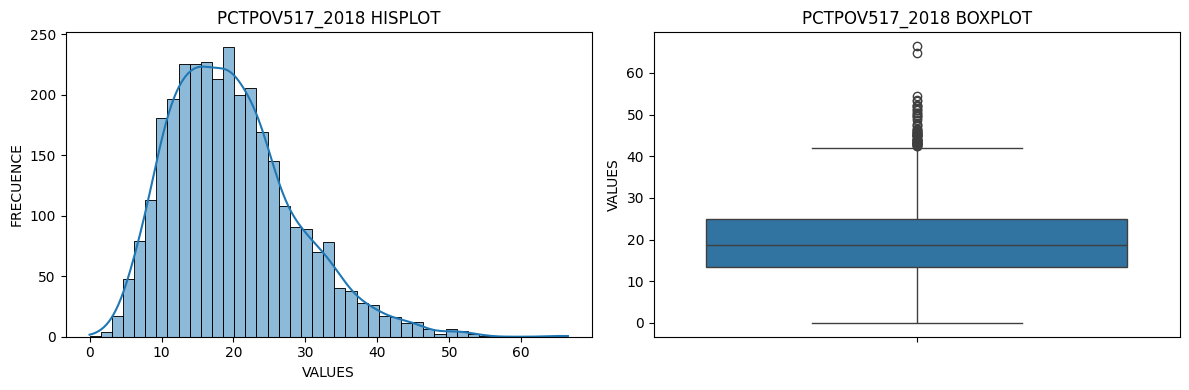

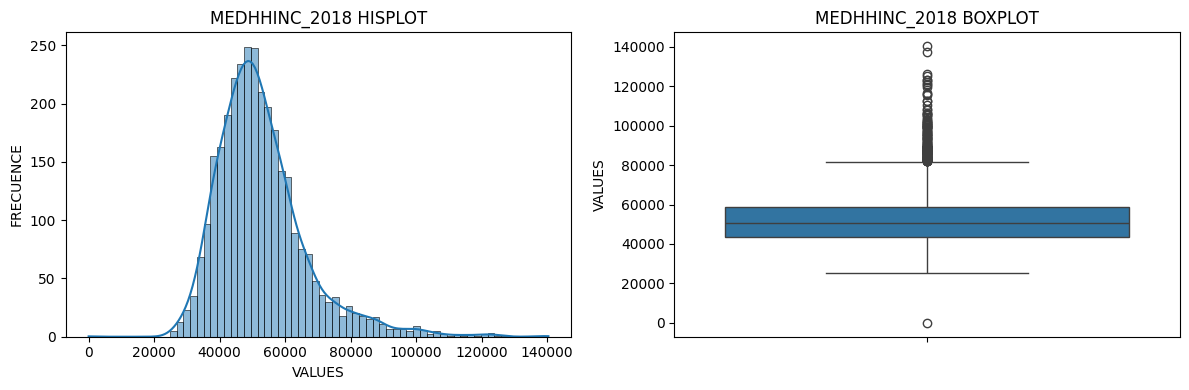

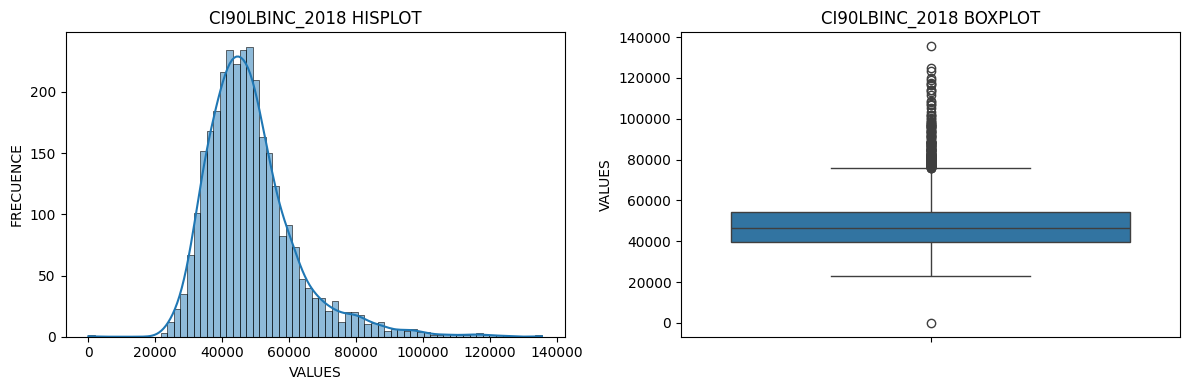

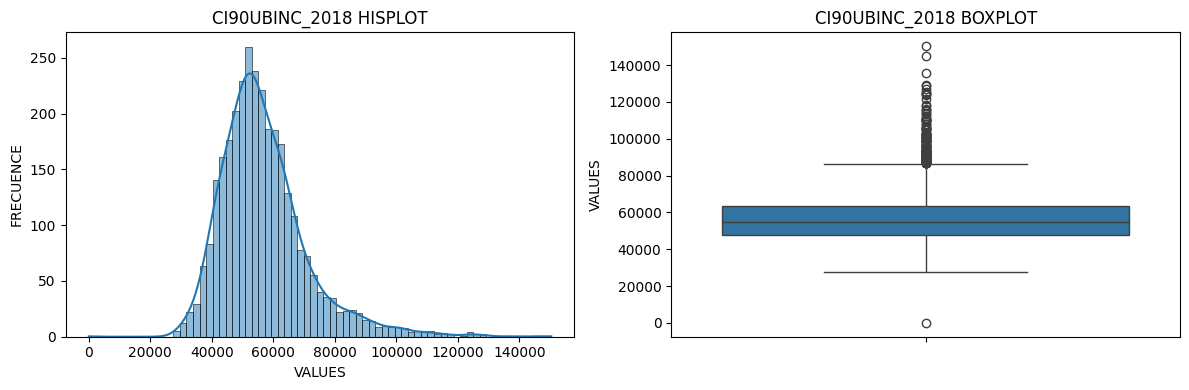

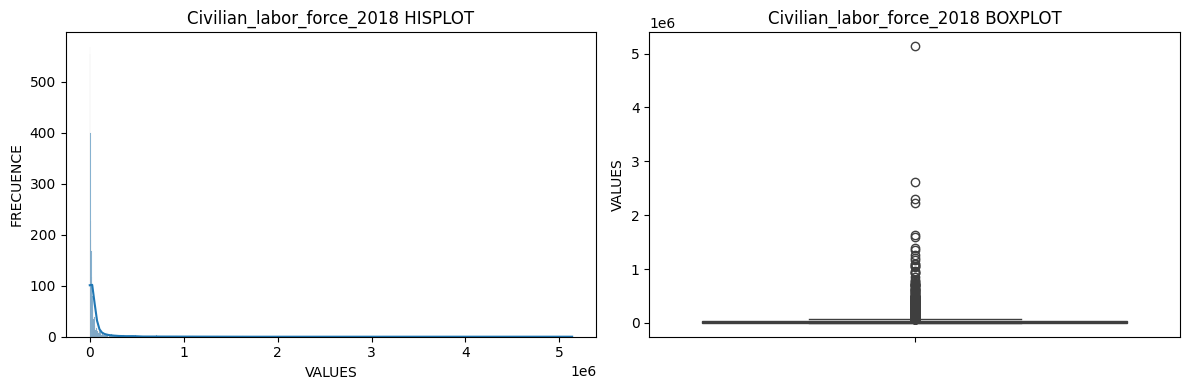

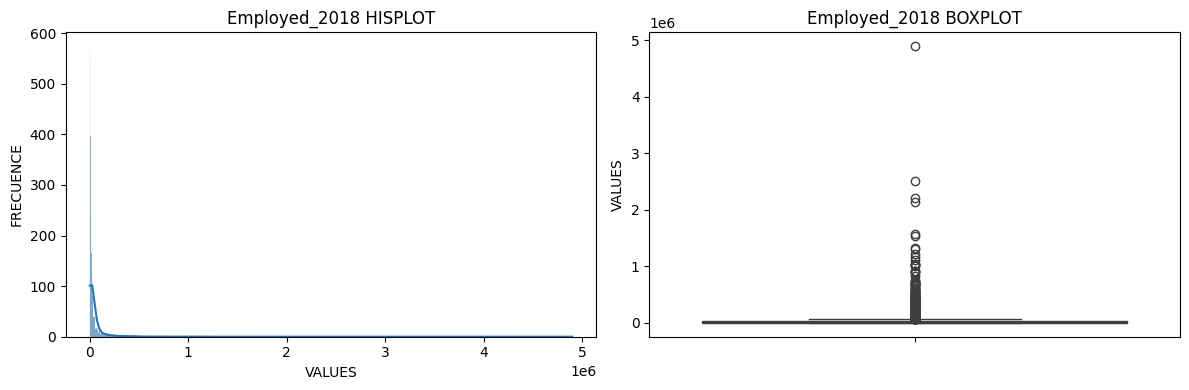

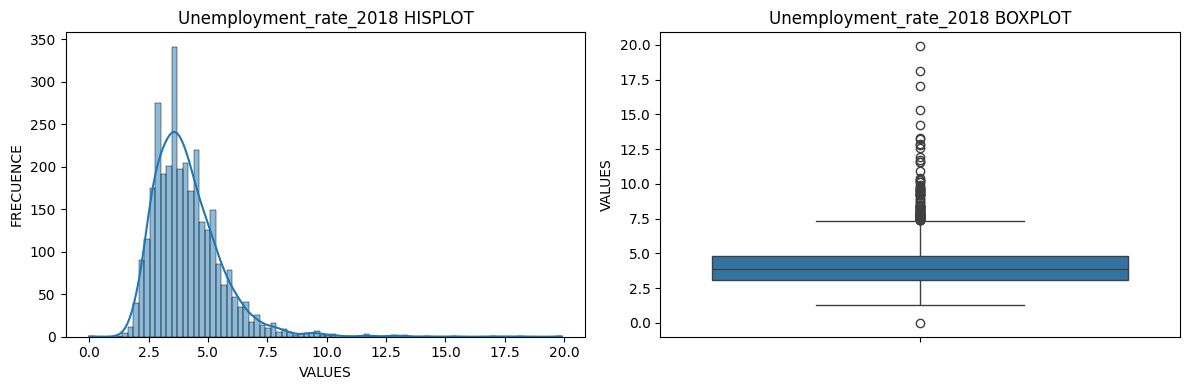

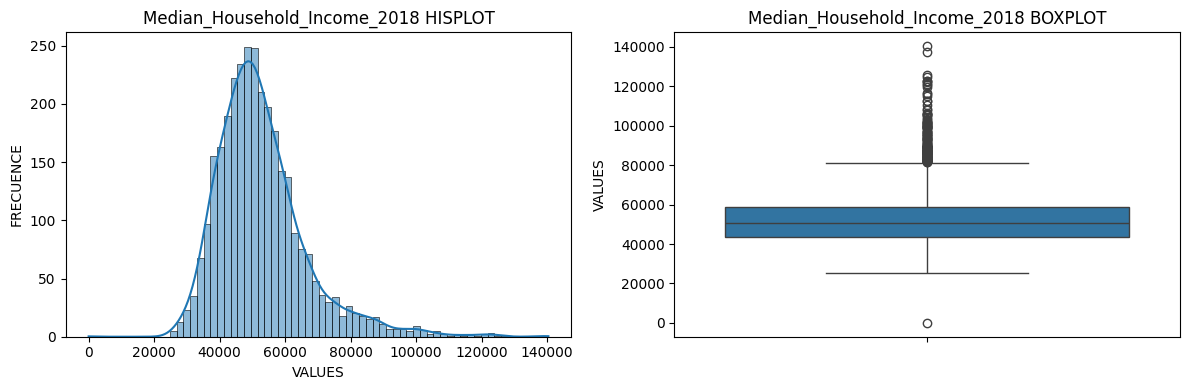

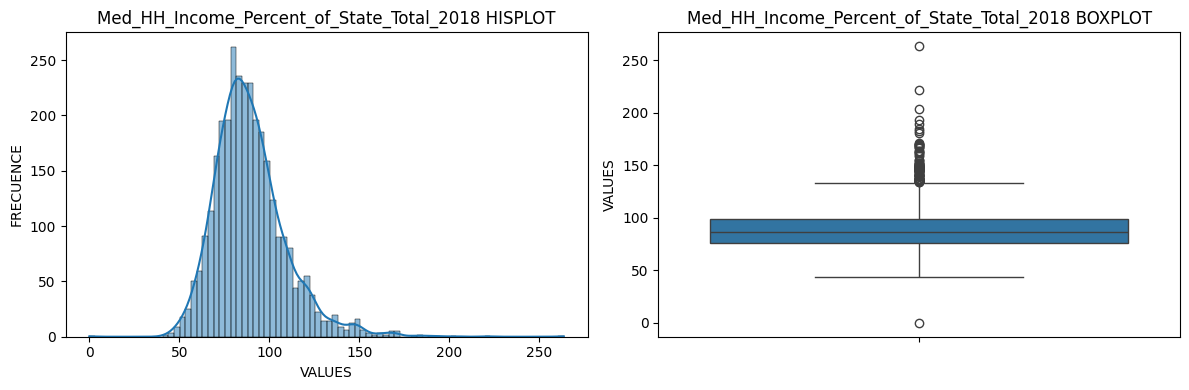

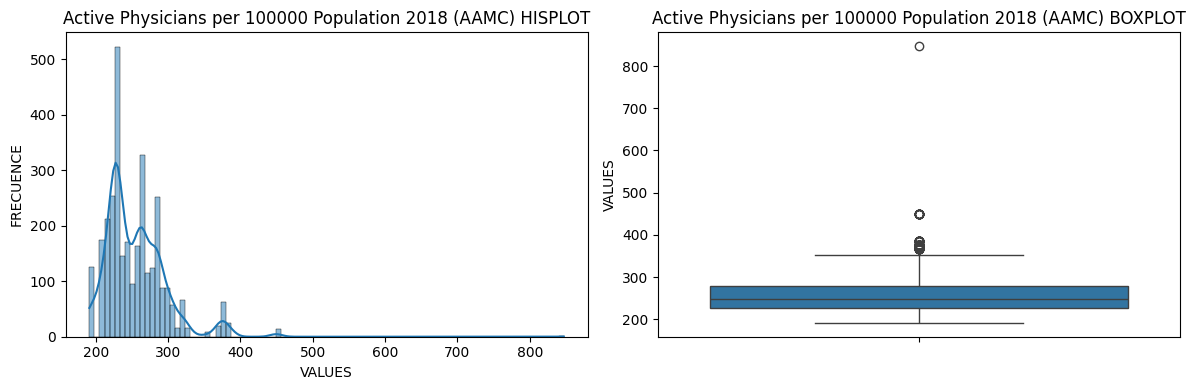

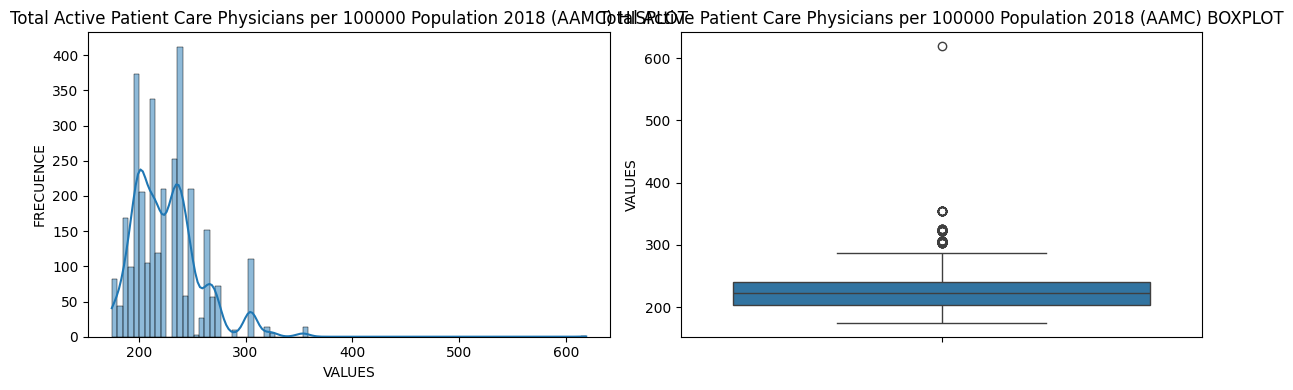

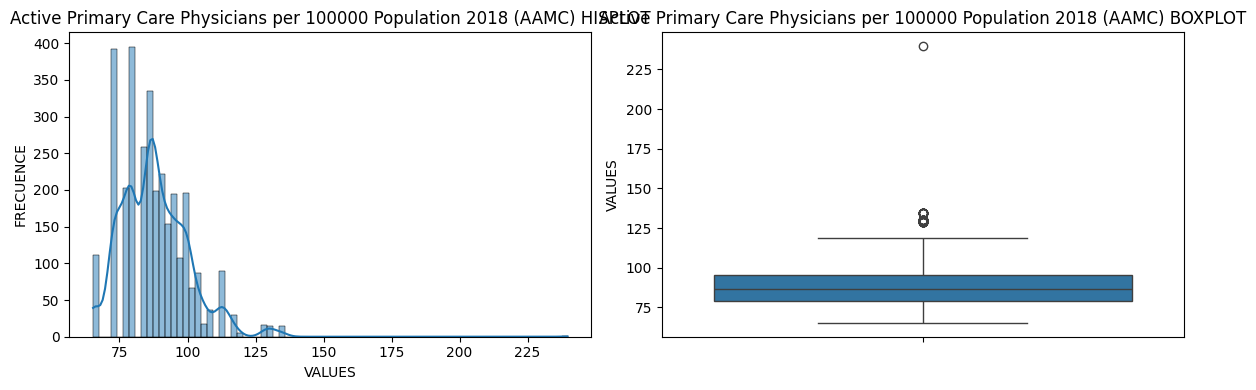

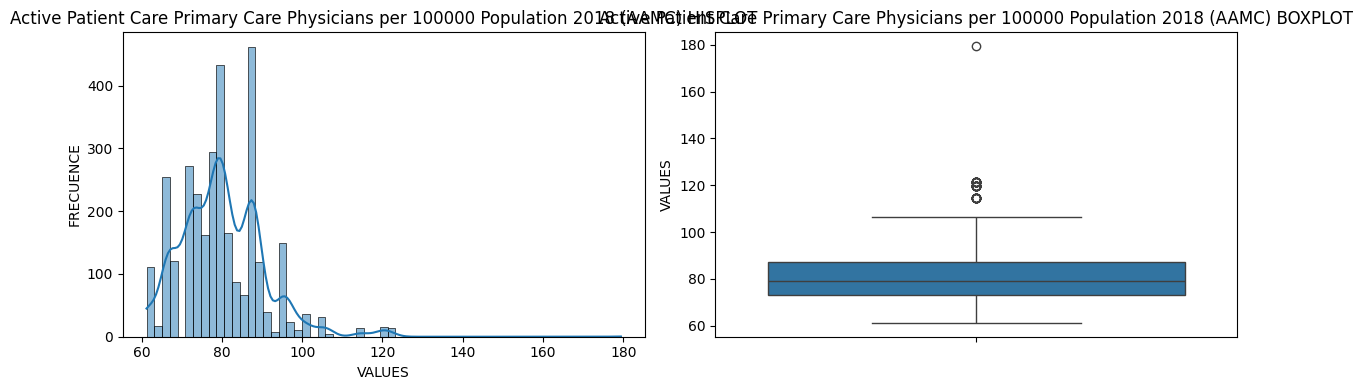

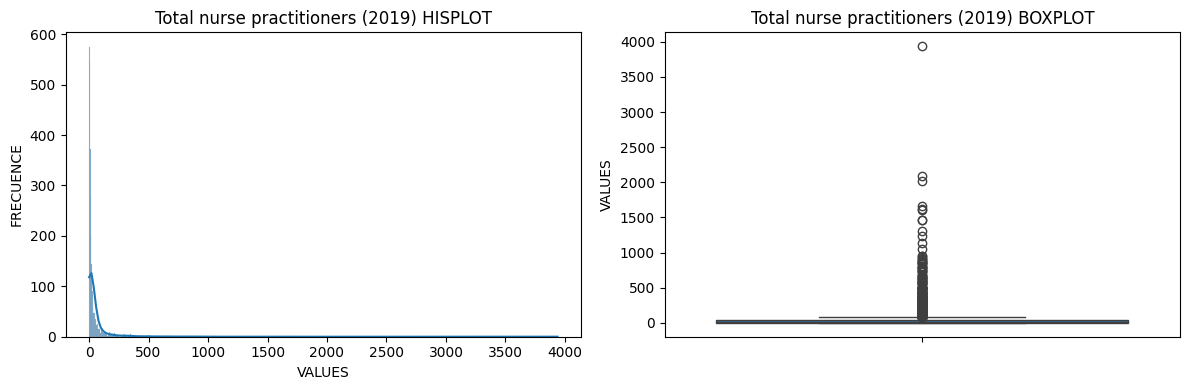

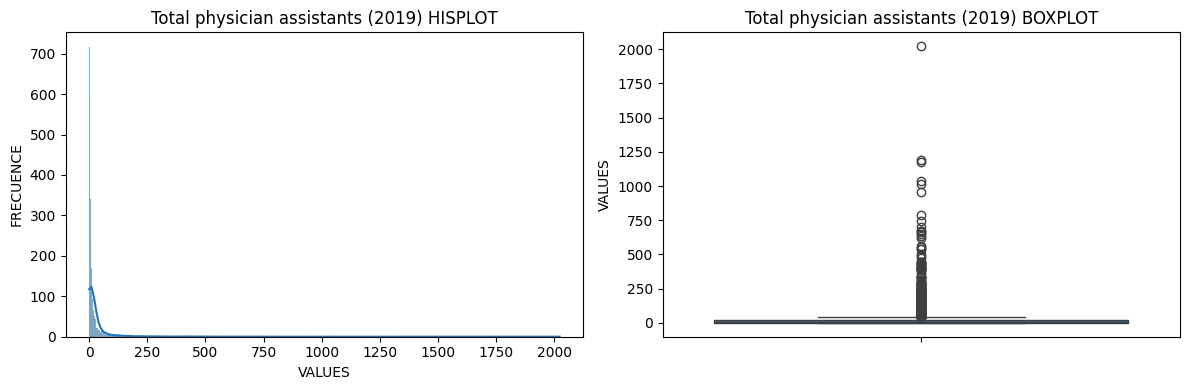

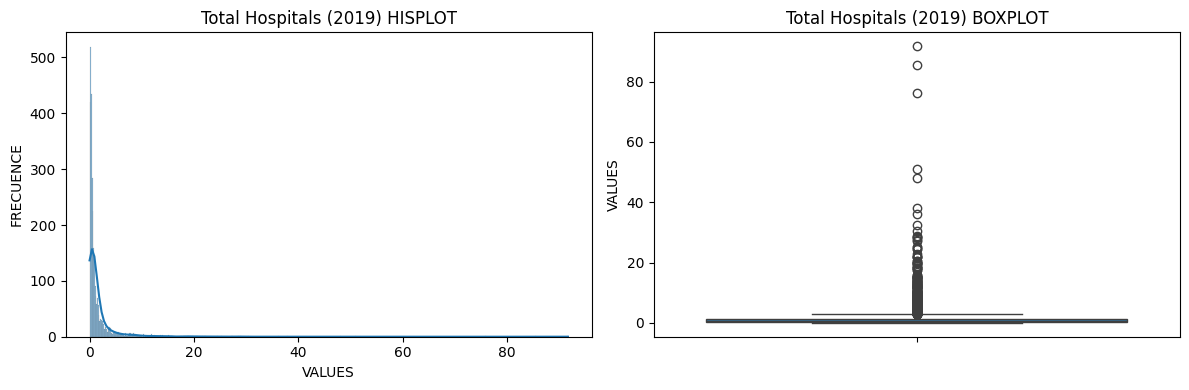

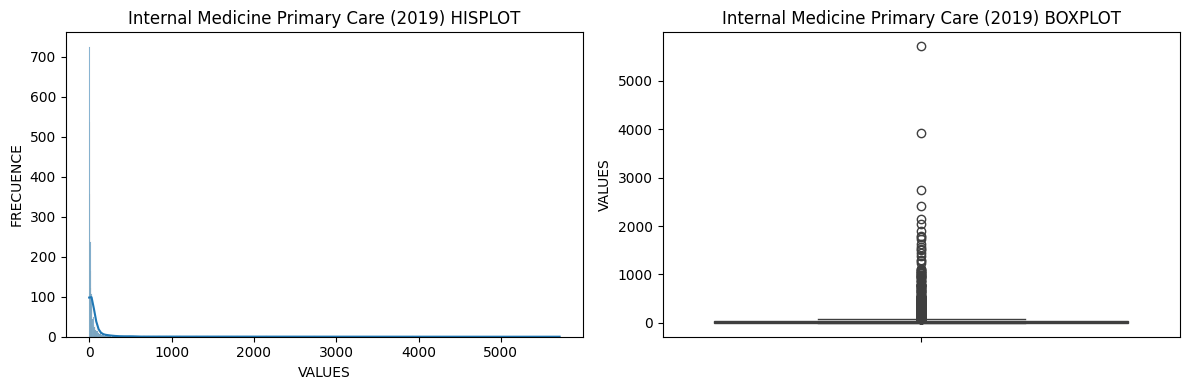

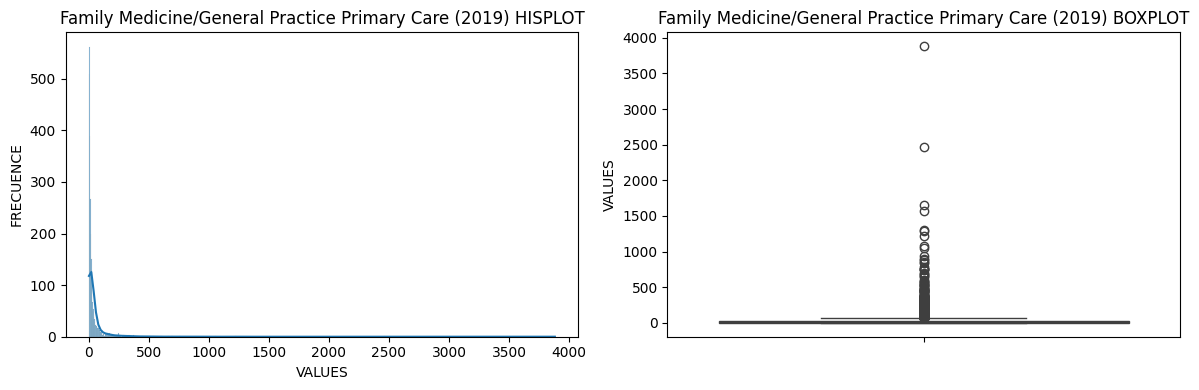

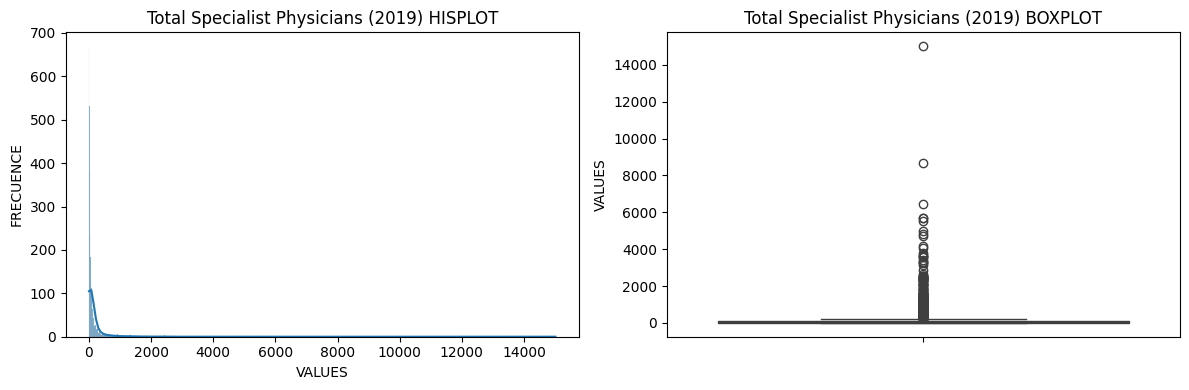

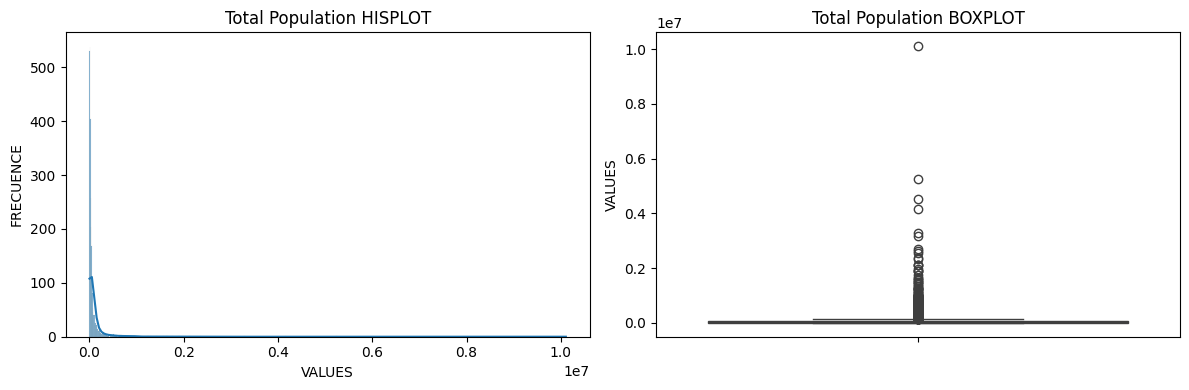

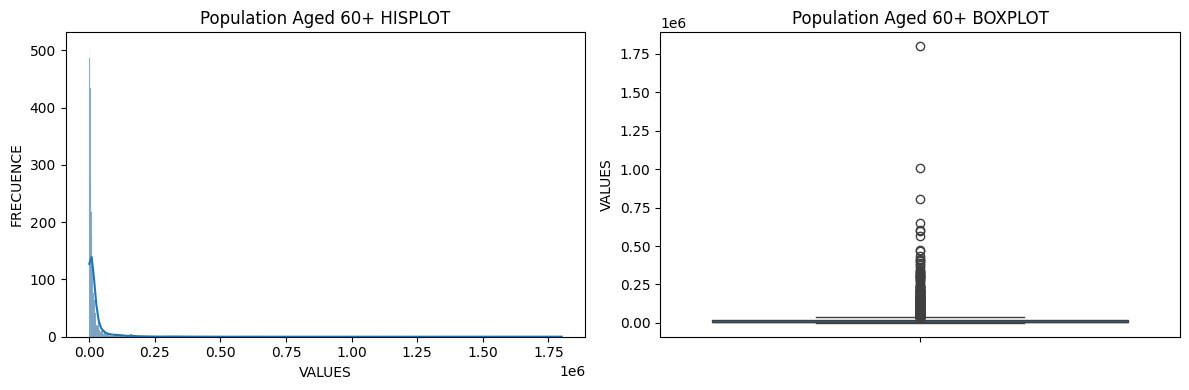

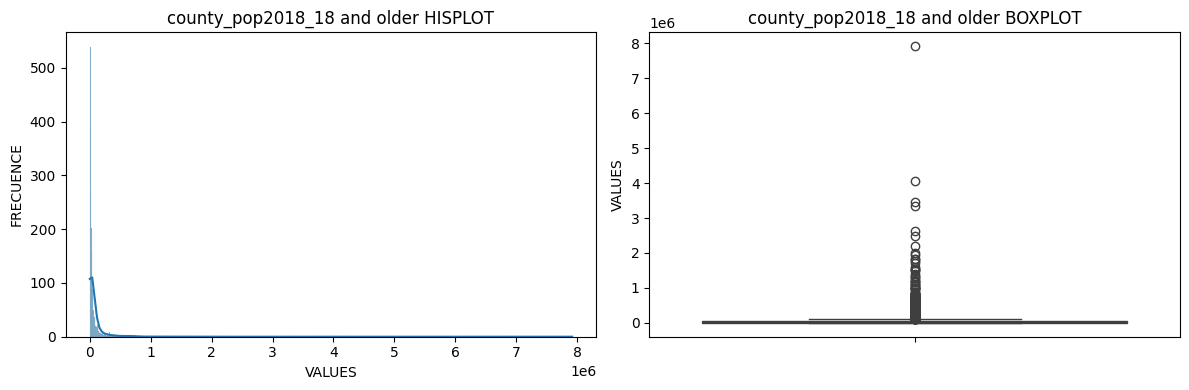

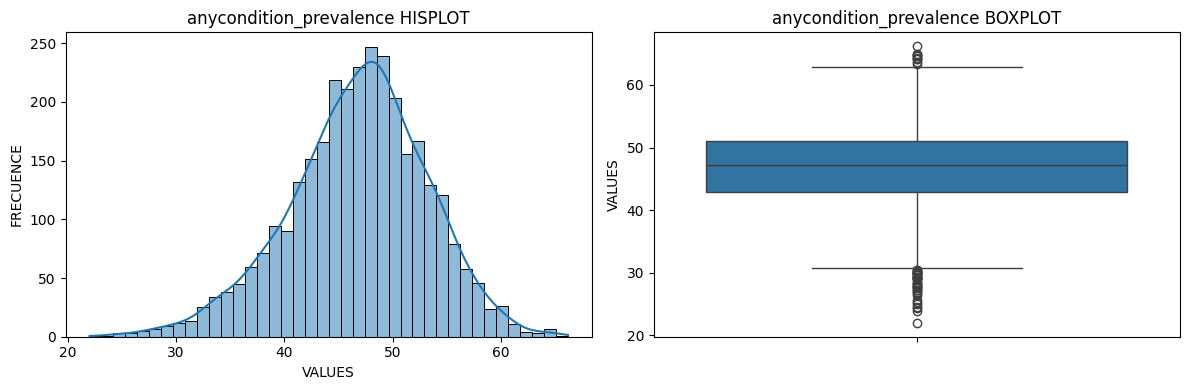

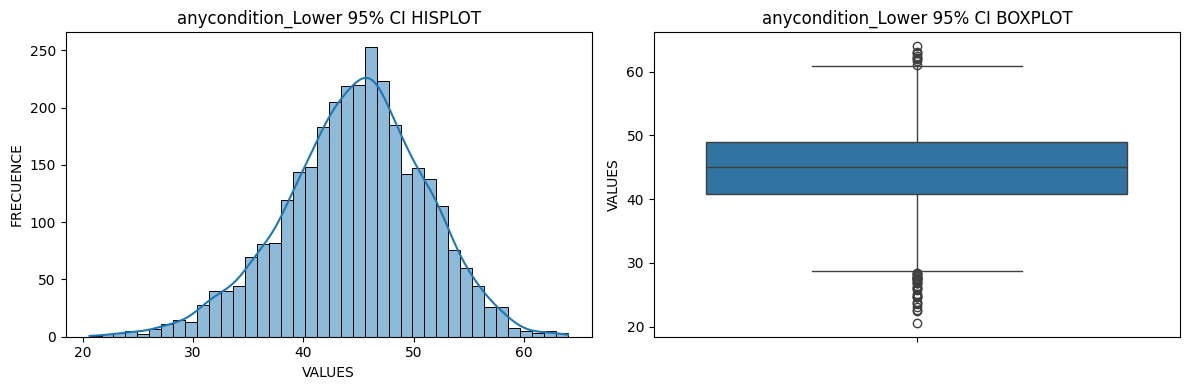

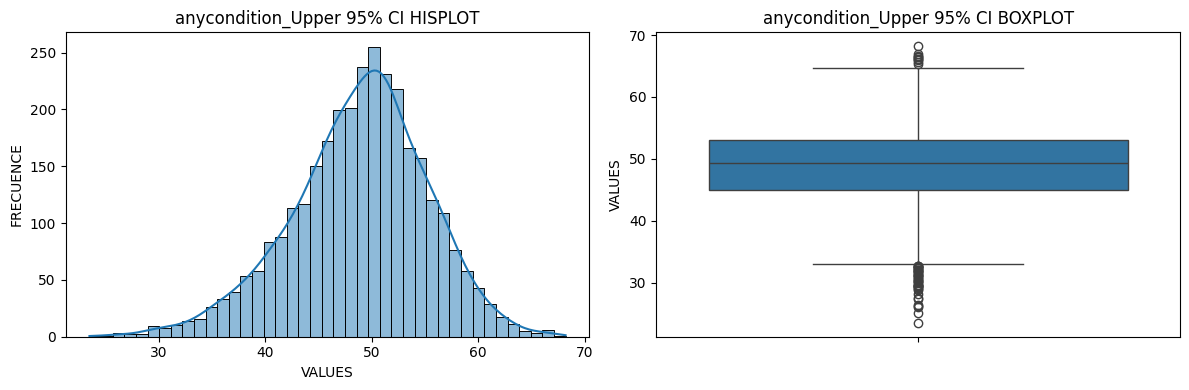

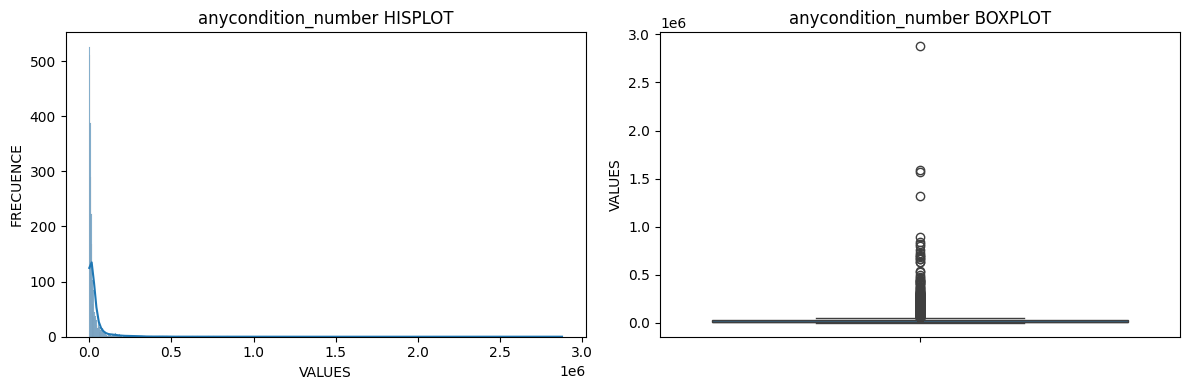

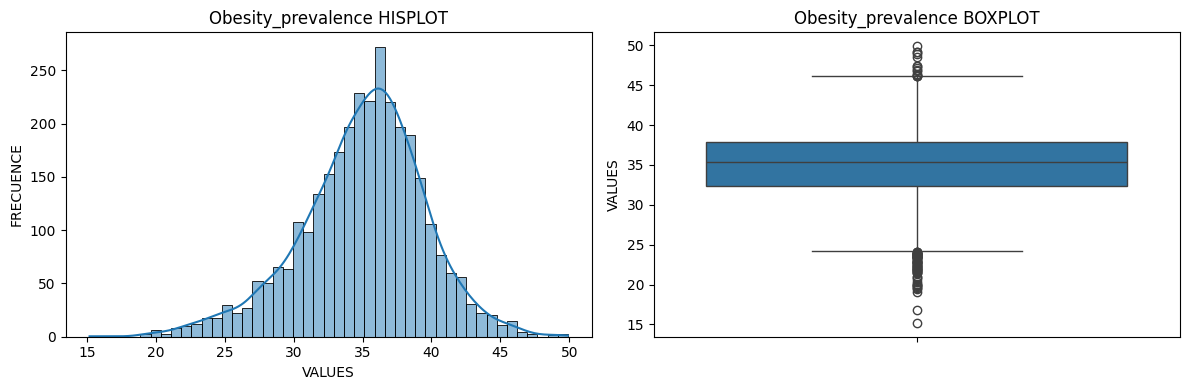

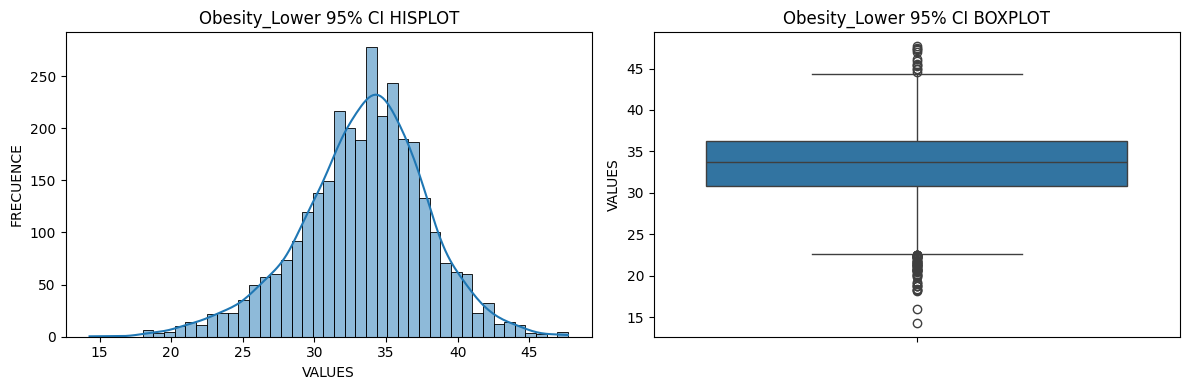

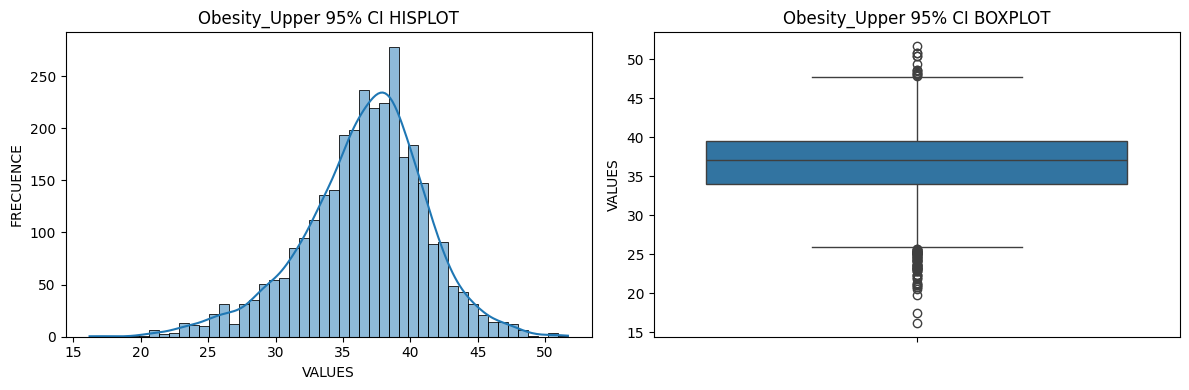

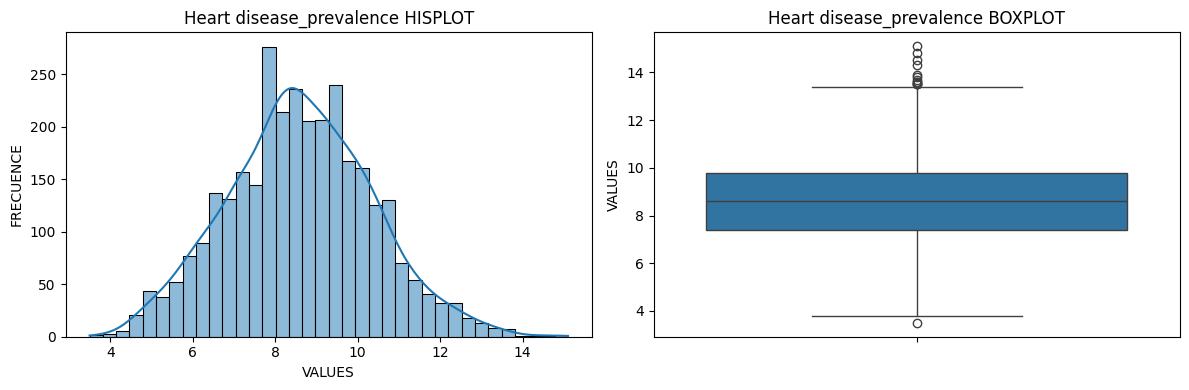

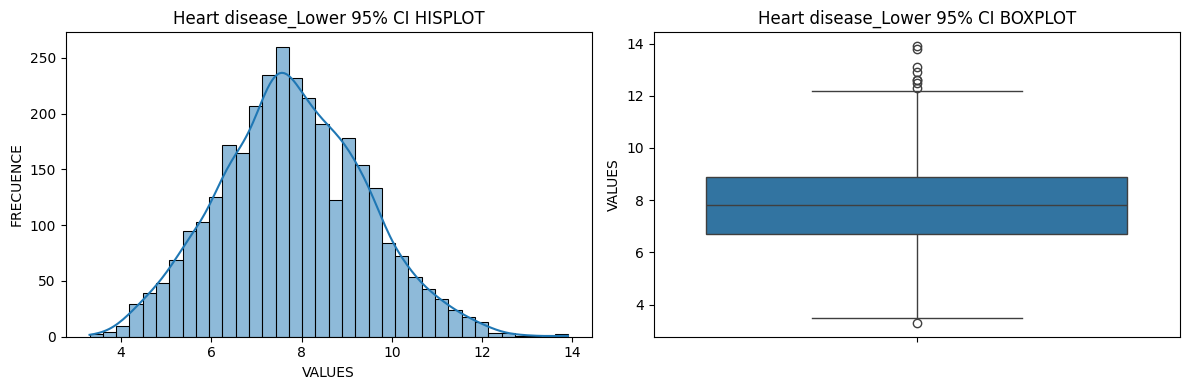

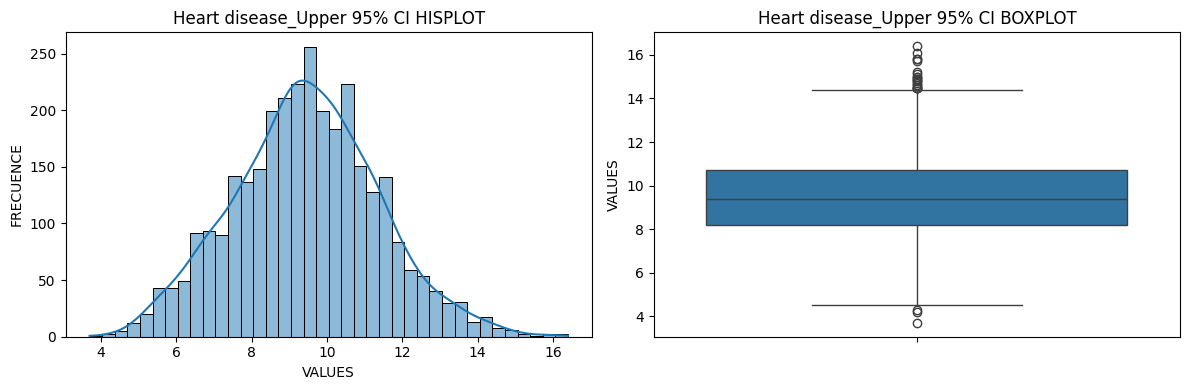

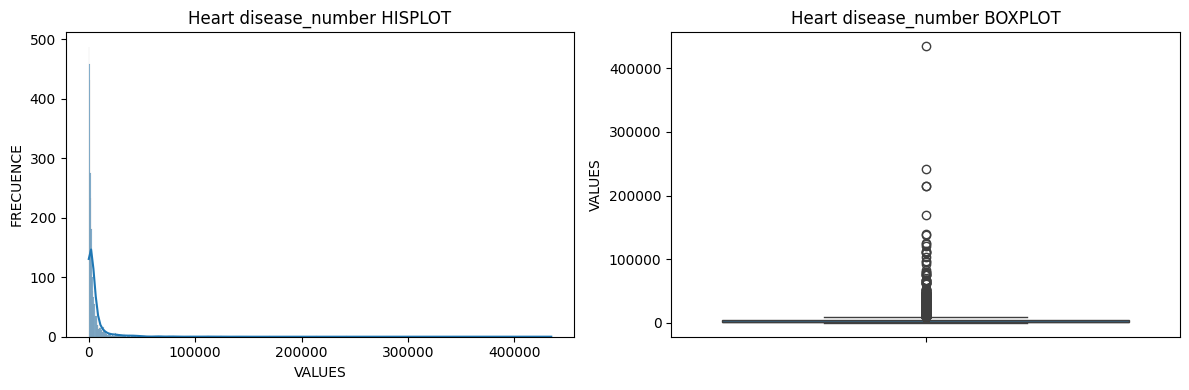

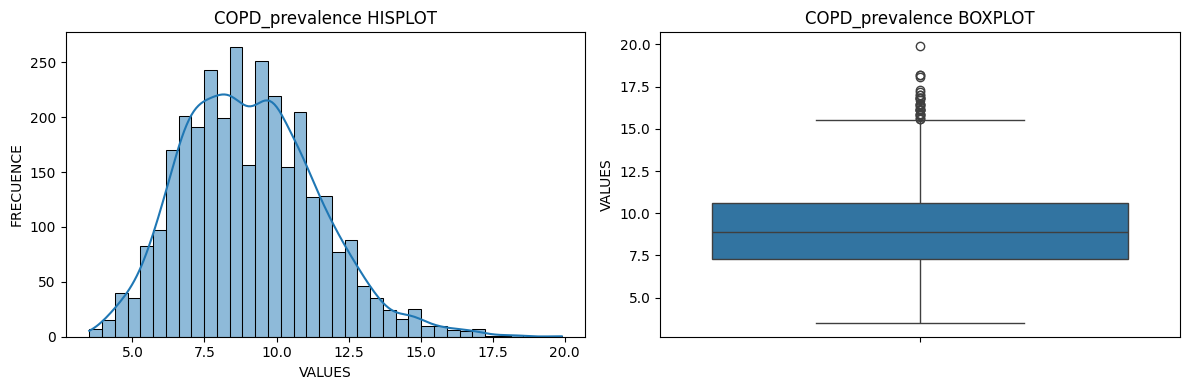

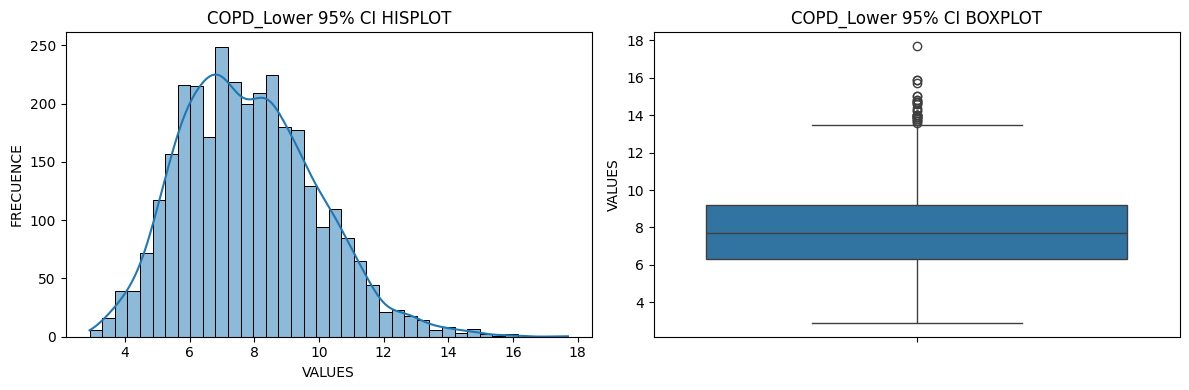

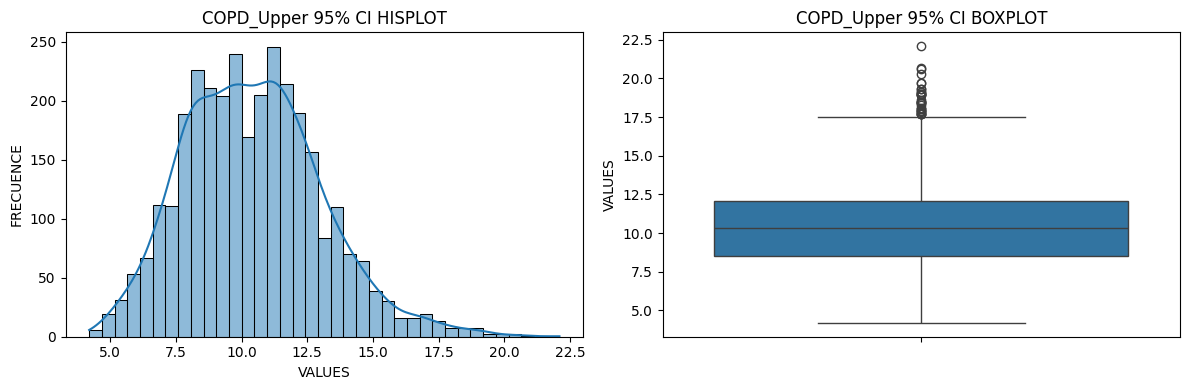

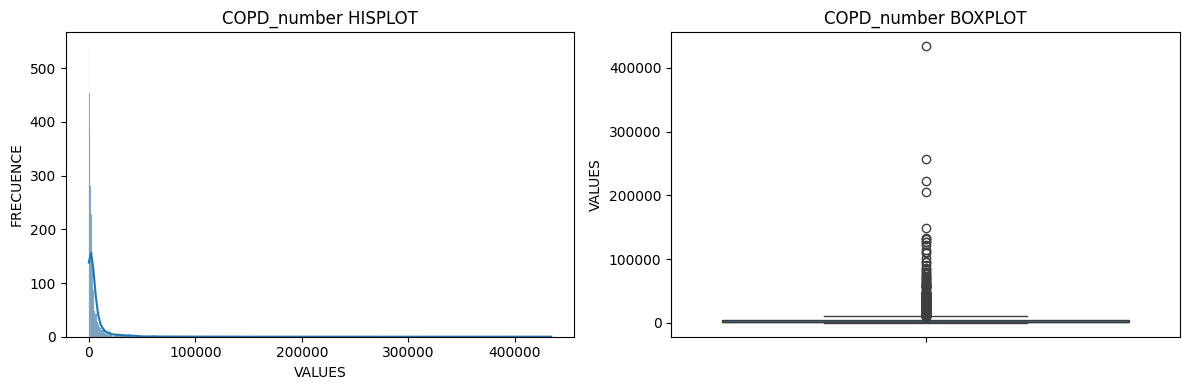

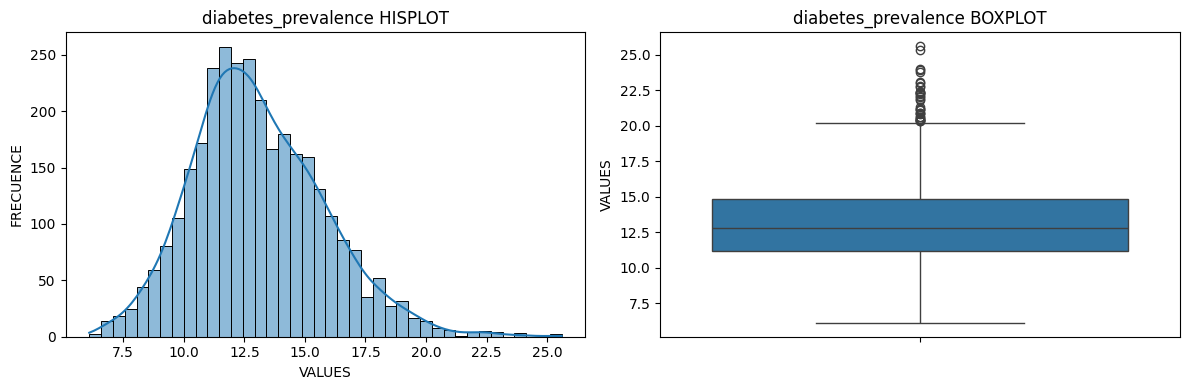

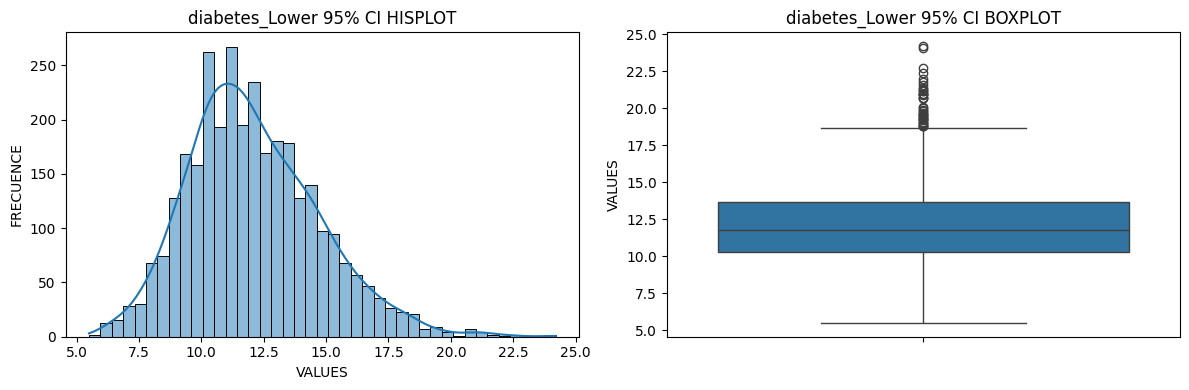

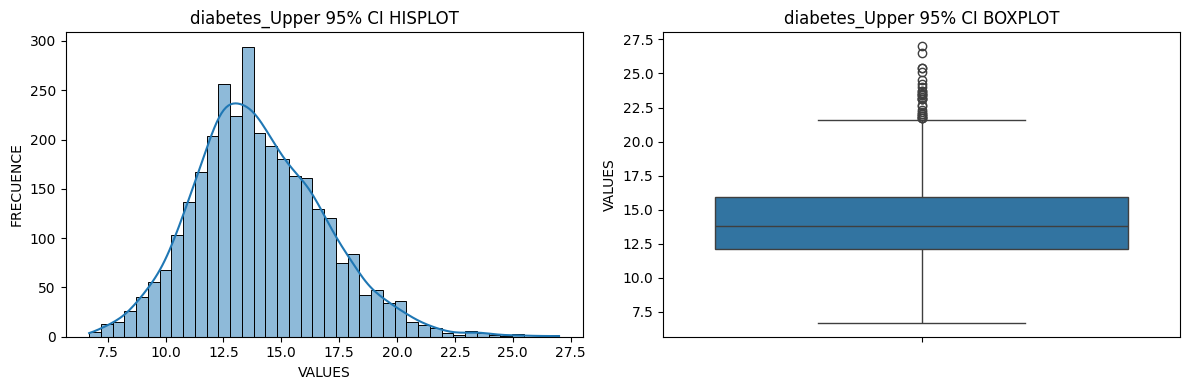

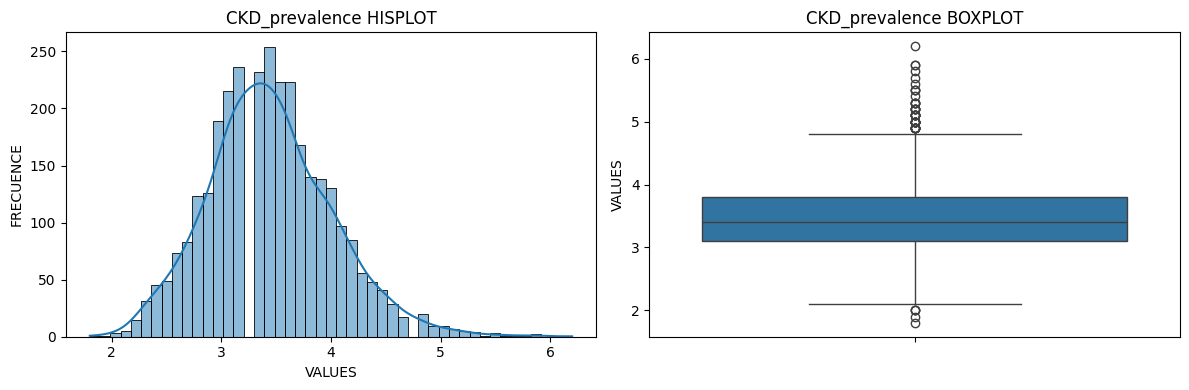

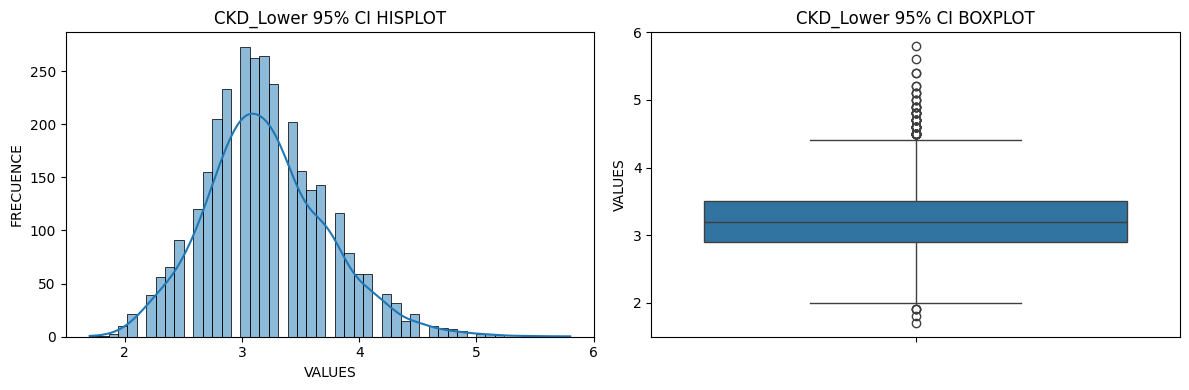

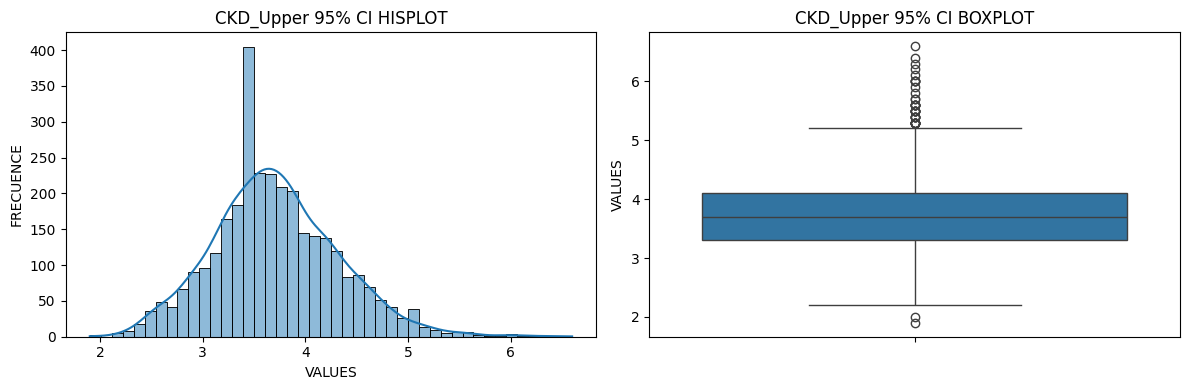

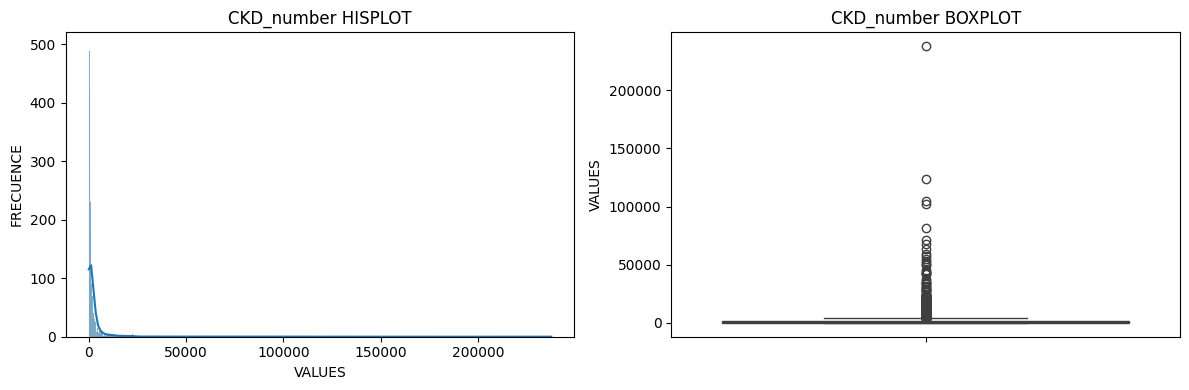

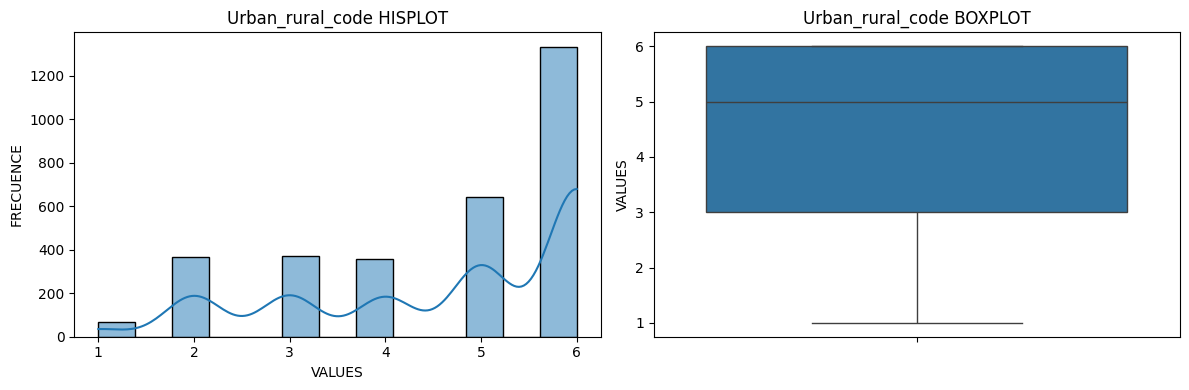

In [22]:
for column in total_data.columns:
    plt.figure(figsize=(12, 4)) 
    plt.subplot(1, 2, 1)  
    sns.histplot(data=total_data, x=column, bins='auto', kde=True)
    plt.title(f'{column} HISPLOT')
    plt.xlabel('VALUES')
    plt.ylabel('FRECUENCE')

    plt.subplot(1, 2, 2)  
    sns.boxplot(data=total_data, y=column)
    plt.title(f'{column} BOXPLOT')
    plt.ylabel('VALUES')

    plt.tight_layout()  
    plt.show()